In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
import folium

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Feature Engineering & EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('drive/My Drive/Multivariado/bdAirbnb1.csv')
print(df1.shape)
df1.head()

(40793, 114)


id  log_price Category property_type        room_type  TV  Cable TV  \
0   6901257   5.010635    Medio     Apartment  Entire home/apt   0         0   
1   6304928   5.129899    Medio     Apartment  Entire home/apt   0         0   
2   7919400   4.976734    Medio     Apartment  Entire home/apt   1         1   
3  13418779   6.620073     Alto         House  Entire home/apt   1         1   
4   3808709   4.744932    Medio     Apartment  Entire home/apt   1         0   

   Wireless Internet  Air conditioning  Kitchen  ...   latitude   longitude  \
0                  1                 1        1  ...  40.696524  -73.991617   
1                  1                 1        1  ...  40.766115  -73.989040   
2                  1                 1        1  ...  40.808110  -73.943756   
3                  1                 0        1  ...  37.772004 -122.431619   
4                  1                 1        1  ...  38.925627  -77.034596   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   
3        Beautiful Flat in the Heart of SF!      Lower Haight   
4                Great studio in midtown DC  Columbia Heights   

   number_of_reviews  review_scores_rating  \
0                  2                 100.0   
1                  6                  93.0   
2                 10                  92.0   
3                  0                   NaN   
4                  4                  40.0   

                                       thumbnail_url  zipcode  bedrooms  beds  
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c...  11201.0       1.0   1.0  
1  https://a0.muscache.com/im/pictures/348a55fe-4...  10019.0       3.0   3.0  
2  https://a0.muscache.com/im/pictures/6fae5362-9...  10027.0       1.0   3.0  
3  https://a0.muscache.com/im/pictures/72208dad-9...  94117.0       2.0   2.0  
4                                                NaN  20009.0       0.0   1.0  

[5 rows x 114 columns]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40793 entries, 0 to 40792
Columns: 114 entries, id to beds
dtypes: bool(1), float64(8), int64(88), object(17)
memory usage: 35.2+ MB


In [ ]:
df_no_num = df1.select_dtypes(exclude=np.number)
df_no_num.head()

Category property_type        room_type  bed_type cancellation_policy  \
0    Medio     Apartment  Entire home/apt  Real Bed              strict   
1    Medio     Apartment  Entire home/apt  Real Bed              strict   
2    Medio     Apartment  Entire home/apt  Real Bed            moderate   
3     Alto         House  Entire home/apt  Real Bed            flexible   
4    Medio     Apartment  Entire home/apt  Real Bed            moderate   

   cleaning_fee city                                        description  \
0          True  NYC  Beautiful, sunlit brownstone 1-bedroom in the ...   
1          True  NYC  Enjoy travelling during your stay in Manhattan...   
2          True  NYC  The Oasis comes complete with a full backyard ...   
3          True   SF  This light-filled home-away-from-home is super...   
4          True   DC  Cool, cozy, and comfortable studio located in ...   

  first_review host_has_profile_pic host_identity_verified host_response_rate  \
0   18/06/2016                    t                      t                NaN   
1   05/08/2017                    t                      f               100%   
2   30/04/2017                    t                      t               100%   
3          NaN                    t                      t                NaN   
4   12/05/2015                    t                      t               100%   

   host_since instant_bookable last_review  \
0  26/03/2012                f  18/07/2016   
1  19/06/2017                t  23/09/2017   
2  25/10/2016                t  14/09/2017   
3  19/04/2015                f         NaN   
4  01/03/2015                t  22/01/2017   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   
3        Beautiful Flat in the Heart of SF!      Lower Haight   
4                Great studio in midtown DC  Columbia Heights   

                                       thumbnail_url  
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c...  
1  https://a0.muscache.com/im/pictures/348a55fe-4...  
2  https://a0.muscache.com/im/pictures/6fae5362-9...  
3  https://a0.muscache.com/im/pictures/72208dad-9...  
4                                                NaN

In [ ]:
df_no_num.nunique()

Category                      3
property_type                33
room_type                     3
bed_type                      5
cancellation_policy           5
cleaning_fee                  2
city                          6
description               40585
first_review               2346
host_has_profile_pic          2
host_identity_verified        2
host_response_rate           77
host_since                 2968
instant_bookable              2
last_review                1201
name                      40532
neighbourhood               589
thumbnail_url             36240
dtype: int64

In [ ]:
df_num = df1.select_dtypes(exclude=np.object)
df_num.head()

id  log_price  TV  Cable TV  Wireless Internet  Air conditioning  \
0   6901257   5.010635   0         0                  1                 1   
1   6304928   5.129899   0         0                  1                 1   
2   7919400   4.976734   1         1                  1                 1   
3  13418779   6.620073   1         1                  1                 0   
4   3808709   4.744932   1         0                  1                 1   

   Kitchen  Free parking on premises  Pets allowed  Breakfast  ...  \
0        1                         0             0          0  ...   
1        1                         0             0          0  ...   
2        1                         0             0          1  ...   
3        1                         0             0          0  ...   
4        1                         0             0          0  ...   

   accommodates  bathrooms  cleaning_fee   latitude   longitude  \
0             3        1.0          True  40.696524  -73.991617   
1             7        1.0          True  40.766115  -73.989040   
2             5        1.0          True  40.808110  -73.943756   
3             4        1.0          True  37.772004 -122.431619   
4             2        1.0          True  38.925627  -77.034596   

   number_of_reviews  review_scores_rating  zipcode  bedrooms  beds  
0                  2                 100.0  11201.0       1.0   1.0  
1                  6                  93.0  10019.0       3.0   3.0  
2                 10                  92.0  10027.0       1.0   3.0  
3                  0                   NaN  94117.0       2.0   2.0  
4                  4                  40.0  20009.0       0.0   1.0  

[5 rows x 97 columns]

In [ ]:
df_num.nunique()

id                      40793
log_price                 660
TV                          2
Cable TV                    2
Wireless Internet           2
                        ...  
number_of_reviews         331
review_scores_rating       52
zipcode                   619
bedrooms                   11
beds                       17
Length: 97, dtype: int64

In [ ]:
df2 = df1.copy(deep=True)

In [ ]:
df2.drop(['description', 'first_review', 'last_review', 'name', 'thumbnail_url'], axis=1, inplace=True)
df2.head()

id  log_price Category property_type        room_type  TV  Cable TV  \
0   6901257   5.010635    Medio     Apartment  Entire home/apt   0         0   
1   6304928   5.129899    Medio     Apartment  Entire home/apt   0         0   
2   7919400   4.976734    Medio     Apartment  Entire home/apt   1         1   
3  13418779   6.620073     Alto         House  Entire home/apt   1         1   
4   3808709   4.744932    Medio     Apartment  Entire home/apt   1         0   

   Wireless Internet  Air conditioning  Kitchen  ...  host_since  \
0                  1                 1        1  ...  26/03/2012   
1                  1                 1        1  ...  19/06/2017   
2                  1                 1        1  ...  25/10/2016   
3                  1                 0        1  ...  19/04/2015   
4                  1                 1        1  ...  01/03/2015   

   instant_bookable   latitude   longitude     neighbourhood  \
0                 f  40.696524  -73.991617  Brooklyn Heights   
1                 t  40.766115  -73.989040    Hell's Kitchen   
2                 t  40.808110  -73.943756            Harlem   
3                 f  37.772004 -122.431619      Lower Haight   
4                 t  38.925627  -77.034596  Columbia Heights   

   number_of_reviews  review_scores_rating  zipcode  bedrooms  beds  
0                  2                 100.0  11201.0       1.0   1.0  
1                  6                  93.0  10019.0       3.0   3.0  
2                 10                  92.0  10027.0       1.0   3.0  
3                  0                   NaN  94117.0       2.0   2.0  
4                  4                  40.0  20009.0       0.0   1.0  

[5 rows x 109 columns]

In [ ]:
df2.nunique()

id                      40793
log_price                 660
Category                    3
property_type              33
room_type                   3
                        ...  
number_of_reviews         331
review_scores_rating       52
zipcode                   619
bedrooms                   11
beds                       17
Length: 109, dtype: int64

In [ ]:
df2.isnull().mean()

id                      0.000000
log_price               0.000000
Category                0.000000
property_type           0.000000
room_type               0.000000
                          ...   
number_of_reviews       0.000000
review_scores_rating    0.226215
zipcode                 0.012649
bedrooms                0.001250
beds                    0.001790
Length: 109, dtype: float64

In [ ]:
def nulos(dff):
  print("+------------------------------+---------------------+")
  print("|Nombre                        |Promedio             |")
  print("+------------------------------+---------------------+")
  for k in dff:
    cadena = "|{:<30}|{:>20.2f}|".format(k, dff[k].isnull().sum())
    print(cadena)
    print("+------------------------------+---------------------+")

In [ ]:
nulos(df2)

+------------------------------+---------------------+
|Nombre                        |Promedio             |
+------------------------------+---------------------+
|id                            |                0.00|
+------------------------------+---------------------+
|log_price                     |                0.00|
+------------------------------+---------------------+
|Category                      |                0.00|
+------------------------------+---------------------+
|property_type                 |                0.00|
+------------------------------+---------------------+
|room_type                     |                0.00|
+------------------------------+---------------------+
|TV                            |                0.00|
+------------------------------+---------------------+
|Cable TV                      |                0.00|
+------------------------------+---------------------+
|Wireless Internet             |                0.00|
+-----------------

In [ ]:
df2.describe()

id     log_price            TV      Cable TV  \
count  4.079300e+04  40793.000000  40793.000000  40793.000000   
mean   1.127312e+07      4.782023      0.703773      0.324713   
std    6.083107e+06      0.718956      0.456598      0.468273   
min    2.404000e+03      1.609438      0.000000      0.000000   
25%    6.278392e+06      4.317488      0.000000      0.000000   
50%    1.226891e+07      4.709530      1.000000      0.000000   
75%    1.641423e+07      5.220356      1.000000      1.000000   
max    2.122836e+07      7.600402      1.000000      1.000000   

       Wireless Internet  Air conditioning       Kitchen  \
count       40793.000000      40793.000000  40793.000000   
mean            0.961685          0.745692      0.912583   
std             0.191959          0.435477      0.282449   
min             0.000000          0.000000      0.000000   
25%             1.000000          0.000000      1.000000   
50%             1.000000          1.000000      1.000000   
75%             1.000000          1.000000      1.000000   
max             1.000000          1.000000      1.000000   

       Free parking on premises  Pets allowed     Breakfast  ...  \
count              40793.000000  40793.000000  40793.000000  ...   
mean                   0.319172      0.135440      0.111955  ...   
std                    0.466162      0.342197      0.315316  ...   
min                    0.000000      0.000000      0.000000  ...   
25%                    0.000000      0.000000      0.000000  ...   
50%                    0.000000      0.000000      0.000000  ...   
75%                    1.000000      0.000000      0.000000  ...   
max                    1.000000      1.000000      1.000000  ...   

       Handheld shower head  accommodates     bathrooms      latitude  \
count          40793.000000  40793.000000  40673.000000  40793.000000   
mean               0.001618      3.160027      1.235967     38.445331   
std                0.040191      2.172946      0.584676      3.083053   
min                0.000000      1.000000      0.000000     33.339327   
25%                0.000000      2.000000      1.000000     34.126168   
50%                0.000000      2.000000      1.000000     40.662714   
75%                0.000000      4.000000      1.000000     40.746234   
max                1.000000     16.000000      8.000000     42.390437   

          longitude  number_of_reviews  review_scores_rating       zipcode  \
count  40793.000000       40793.000000          31565.000000  40277.000000   
mean     -92.419372          21.074253             94.084524  44924.353303   
std       21.717441          38.167921              7.809297  38711.491398   
min     -122.510905           0.000000             20.000000   2108.000000   
25%     -118.343365           1.000000             92.000000  10301.000000   
50%      -76.996000           6.000000             96.000000  20002.000000   
75%      -73.954438          24.000000            100.000000  90066.000000   
max      -70.985047         542.000000            100.000000  99135.000000   

           bedrooms          beds  
count  40742.000000  40720.000000  
mean       1.264960      1.714882  
std        0.855374      1.272300  
min        0.000000      0.000000  
25%        1.000000      1.000000  
50%        1.000000      1.000000  
75%        1.000000      2.000000  
max       10.000000     16.000000  

[8 rows x 96 columns]

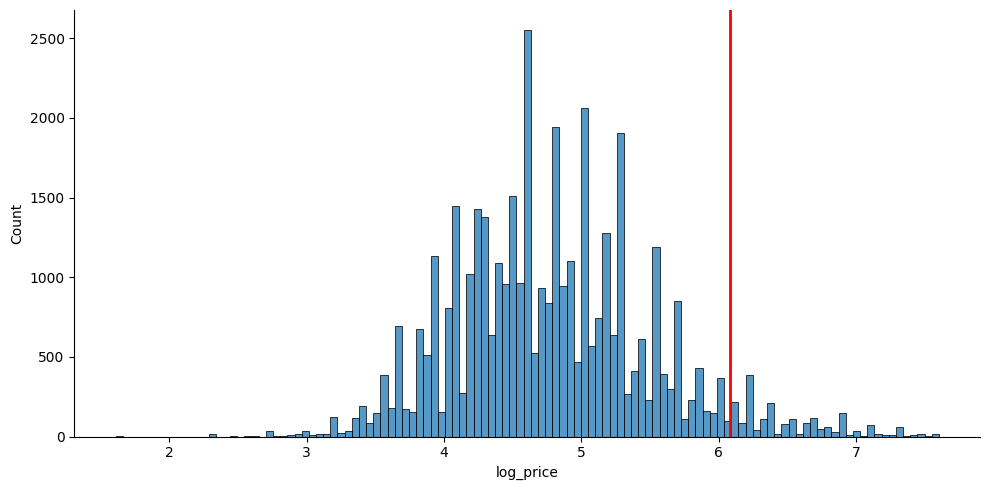

In [ ]:
sns.displot(data = df2['log_price'], height=5, aspect=2)
plt.axvline(df2['log_price'].quantile(0.95), linewidth = 2, color='red')

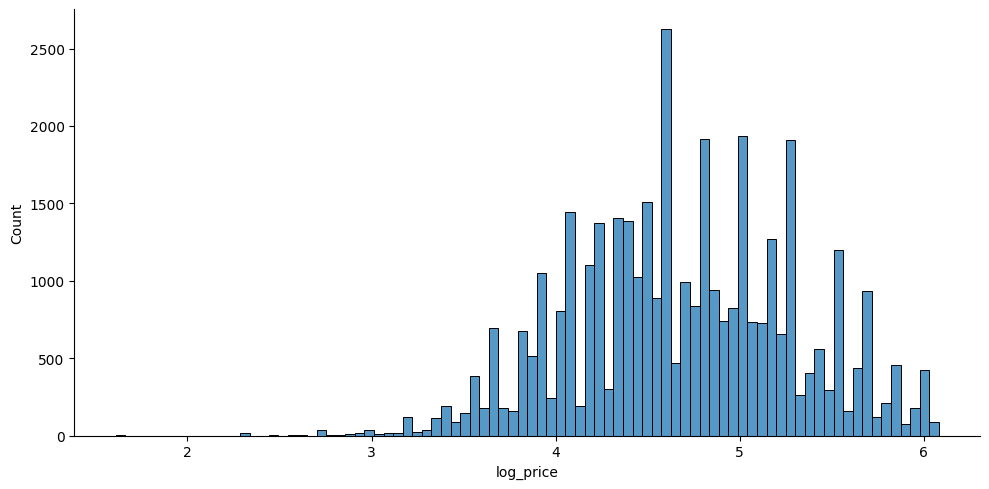

In [ ]:
dfgraph = df2[ df2['log_price'] < df2['log_price'].quantile(0.95)     ]
sns.displot(data = dfgraph['log_price'], height=5, aspect=2)

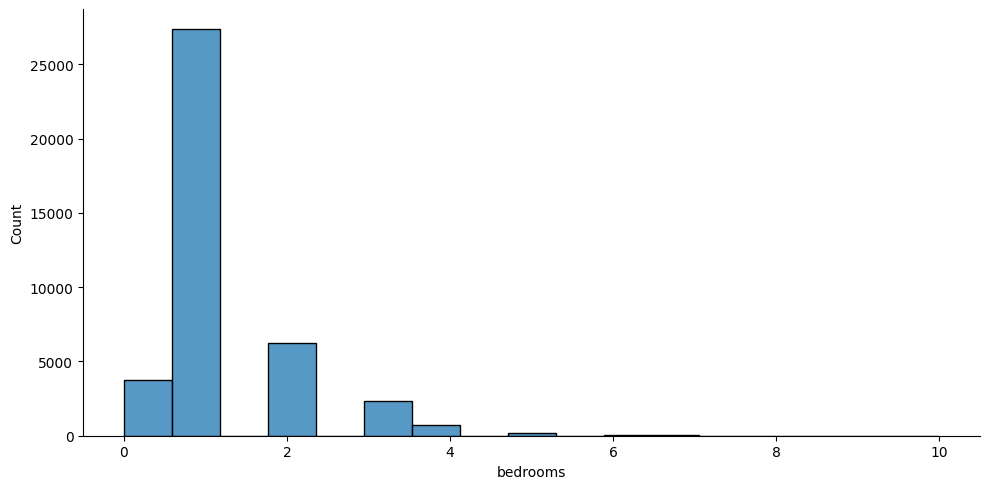

In [ ]:
sns.displot(data = df2['bedrooms'], height=5, aspect=2)

<Axes: xlabel='bedrooms', ylabel='log_price'>

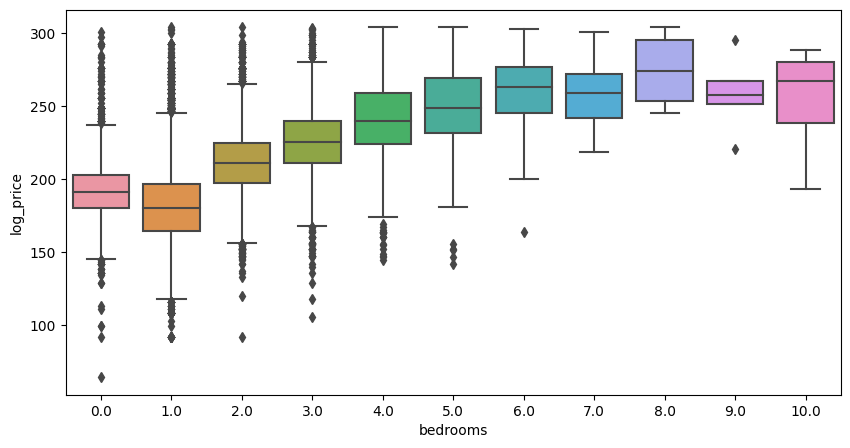

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='bedrooms',y=df2['log_price']*40, data=df2)

In [ ]:
df2['cleaning_fee'] = df2['cleaning_fee'].replace({True:1, False:0})
df2['host_has_profile_pic'] = df2['host_has_profile_pic'].replace({'t':1, 'f':0})
df2['host_identity_verified'] = df2['host_identity_verified'].replace({'t':1, 'f':0})
df2['instant_bookable'] = df2['instant_bookable'].replace({'t':1, 'f':0})
df2

id  log_price Category property_type        room_type  TV  \
0       6901257   5.010635    Medio     Apartment  Entire home/apt   0   
1       6304928   5.129899    Medio     Apartment  Entire home/apt   0   
2       7919400   4.976734    Medio     Apartment  Entire home/apt   1   
3      13418779   6.620073     Alto         House  Entire home/apt   1   
4       3808709   4.744932    Medio     Apartment  Entire home/apt   1   
...         ...        ...      ...           ...              ...  ..   
40788  19031255   4.595120     Bajo         House     Private room   1   
40789     54382   5.075174    Medio     Apartment  Entire home/apt   0   
40790  16882177   5.703782     Alto         House  Entire home/apt   1   
40791  15132699   5.521461     Alto          Loft  Entire home/apt   0   
40792   6373394   4.744932    Medio     Apartment  Entire home/apt   1   

       Cable TV  Wireless Internet  Air conditioning  Kitchen  ...  \
0             0                  1                 1        1  ...   
1             0                  1                 1        1  ...   
2             1                  1                 1        1  ...   
3             1                  1                 0        1  ...   
4             0                  1                 1        1  ...   
...         ...                ...               ...      ...  ...   
40788         0                  1                 1        1  ...   
40789         0                  1                 1        1  ...   
40790         0                  1                 1        1  ...   
40791         0                  1                 1        1  ...   
40792         0                  1                 0        0  ...   

       host_since  instant_bookable   latitude   longitude  \
0      26/03/2012                 0  40.696524  -73.991617   
1      19/06/2017                 1  40.766115  -73.989040   
2      25/10/2016                 1  40.808110  -73.943756   
3      19/04/2015                 0  37.772004 -122.431619   
4      01/03/2015                 1  38.925627  -77.034596   
...           ...               ...        ...         ...   
40788  20/08/2013                 0  33.983187 -118.465308   
40789  02/11/2011                 0  40.709135  -73.952358   
40790  15/03/2015                 0  34.109052 -118.008534   
40791  27/05/2013                 0  40.747557  -73.994368   
40792  05/03/2011                 0  40.685001  -73.938863   

            neighbourhood  number_of_reviews  review_scores_rating  zipcode  \
0        Brooklyn Heights                  2                 100.0  11201.0   
1          Hell's Kitchen                  6                  93.0  10019.0   
2                  Harlem                 10                  92.0  10027.0   
3            Lower Haight                  0                   NaN  94117.0   
4        Columbia Heights                  4                  40.0  20009.0   
...                   ...                ...                   ...      ...   
40788              Venice                 29                  90.0  90291.0   
40789        Williamsburg                  1                 100.0  11211.0   
40790                 NaN                  0                   NaN  91006.0   
40791             Chelsea                  1                 100.0  10001.0   
40792  Bedford-Stuyvesant                  3                  80.0  11221.0   

       bedrooms  beds  
0           1.0   1.0  
1           3.0   3.0  
2           1.0   3.0  
3           2.0   2.0  
4           0.0   1.0  
...         ...   ...  
40788       1.0   1.0  
40789       1.0   1.0  
40790       3.0   6.0  
40791       1.0   1.0  
40792       2.0   2.0  

[40793 rows x 109 columns]

In [ ]:
df2['Category']=df2['Category'].replace({'Bajo':1,'Medio':2,'Alto':3})
df2

id  log_price  Category property_type        room_type  TV  \
0       6901257   5.010635         2     Apartment  Entire home/apt   0   
1       6304928   5.129899         2     Apartment  Entire home/apt   0   
2       7919400   4.976734         2     Apartment  Entire home/apt   1   
3      13418779   6.620073         3         House  Entire home/apt   1   
4       3808709   4.744932         2     Apartment  Entire home/apt   1   
...         ...        ...       ...           ...              ...  ..   
40788  19031255   4.595120         1         House     Private room   1   
40789     54382   5.075174         2     Apartment  Entire home/apt   0   
40790  16882177   5.703782         3         House  Entire home/apt   1   
40791  15132699   5.521461         3          Loft  Entire home/apt   0   
40792   6373394   4.744932         2     Apartment  Entire home/apt   1   

       Cable TV  Wireless Internet  Air conditioning  Kitchen  ...  \
0             0                  1                 1        1  ...   
1             0                  1                 1        1  ...   
2             1                  1                 1        1  ...   
3             1                  1                 0        1  ...   
4             0                  1                 1        1  ...   
...         ...                ...               ...      ...  ...   
40788         0                  1                 1        1  ...   
40789         0                  1                 1        1  ...   
40790         0                  1                 1        1  ...   
40791         0                  1                 1        1  ...   
40792         0                  1                 0        0  ...   

       host_since  instant_bookable   latitude   longitude  \
0      26/03/2012                 0  40.696524  -73.991617   
1      19/06/2017                 1  40.766115  -73.989040   
2      25/10/2016                 1  40.808110  -73.943756   
3      19/04/2015                 0  37.772004 -122.431619   
4      01/03/2015                 1  38.925627  -77.034596   
...           ...               ...        ...         ...   
40788  20/08/2013                 0  33.983187 -118.465308   
40789  02/11/2011                 0  40.709135  -73.952358   
40790  15/03/2015                 0  34.109052 -118.008534   
40791  27/05/2013                 0  40.747557  -73.994368   
40792  05/03/2011                 0  40.685001  -73.938863   

            neighbourhood  number_of_reviews  review_scores_rating  zipcode  \
0        Brooklyn Heights                  2                 100.0  11201.0   
1          Hell's Kitchen                  6                  93.0  10019.0   
2                  Harlem                 10                  92.0  10027.0   
3            Lower Haight                  0                   NaN  94117.0   
4        Columbia Heights                  4                  40.0  20009.0   
...                   ...                ...                   ...      ...   
40788              Venice                 29                  90.0  90291.0   
40789        Williamsburg                  1                 100.0  11211.0   
40790                 NaN                  0                   NaN  91006.0   
40791             Chelsea                  1                 100.0  10001.0   
40792  Bedford-Stuyvesant                  3                  80.0  11221.0   

       bedrooms  beds  
0           1.0   1.0  
1           3.0   3.0  
2           1.0   3.0  
3           2.0   2.0  
4           0.0   1.0  
...         ...   ...  
40788       1.0   1.0  
40789       1.0   1.0  
40790       3.0   6.0  
40791       1.0   1.0  
40792       2.0   2.0  

[40793 rows x 109 columns]

In [ ]:
df2['cleaning_fee'] = df2['cleaning_fee'].replace({True:1, False:0})
df2['cleaning_fee']

0        1
1        1
2        1
3        1
4        1
        ..
40788    1
40789    1
40790    1
40791    0
40792    1
Name: cleaning_fee, Length: 40793, dtype: int64

In [ ]:
df2['cancellation_policy']

0          strict
1          strict
2        moderate
3        flexible
4        moderate
           ...   
40788    flexible
40789    moderate
40790      strict
40791      strict
40792    flexible
Name: cancellation_policy, Length: 40793, dtype: object

In [ ]:
df2['host_since']

0        26/03/2012
1        19/06/2017
2        25/10/2016
3        19/04/2015
4        01/03/2015
            ...    
40788    20/08/2013
40789    02/11/2011
40790    15/03/2015
40791    27/05/2013
40792    05/03/2011
Name: host_since, Length: 40793, dtype: object

In [ ]:
df2['host_since'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 40793 entries, 0 to 40792
Series name: host_since
Non-Null Count  Dtype 
--------------  ----- 
40682 non-null  object
dtypes: object(1)
memory usage: 318.8+ KB


In [ ]:
from datetime import datetime

In [ ]:
df2['host_since']

0        26/03/2012
1        19/06/2017
2        25/10/2016
3        19/04/2015
4        01/03/2015
            ...    
40788    20/08/2013
40789    02/11/2011
40790    15/03/2015
40791    27/05/2013
40792    05/03/2011
Name: host_since, Length: 40793, dtype: object

In [ ]:

df2['host_since']=pd.to_datetime(df2['host_since'])

In [ ]:
df2['host_since'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 40793 entries, 0 to 40792
Series name: host_since
Non-Null Count  Dtype         
--------------  -----         
40682 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 318.8 KB


In [ ]:
df2.columns.values

array(['id', 'log_price', 'Category', 'property_type', 'room_type', 'TV',
       'Cable TV', 'Wireless Internet', 'Air conditioning', 'Kitchen',
       'Free parking on premises', 'Pets allowed', 'Breakfast',
       'Elevator', 'Hot tub', 'Indoor fireplace', 'Heating',
       'Family/kid friendly', 'Suitable for events', 'Washer', 'Dryer',
       'Smoke detector', 'Carbon monoxide detector', 'First aid kit',
       'Safety card', 'Fire extinguisher', 'Essentials', 'Shampoo',
       'Lock on bedroom door', 'Hangers', 'Hair dryer', 'Iron',
       'Laptop friendly workspace', 'Self Check-In', 'Keypad',
       'Private entrance', 'Baby monitor', 'Bathtub', 'Baby bath',
       'Changing table', 'Childrenâ€™s books and toys', 'Window guards',
       'Table corner guards', 'Fireplace guards',
       'Babysitter recommendations', 'Crib', 'Room-darkening shades',
       'Game console', 'Hot water', 'Bed linens',
       'Extra pillows and blankets', 'Ethernet connection', 'Pocket wifi',
       '

In [ ]:
if 'host_since_year' not in df2.columns.values: df2.insert(15,'host_since_year','')
i=0
for k in df2['host_since']:
  df2['host_since_year'][i]=k.year
  i+=1

In [ ]:
df2['host_since_year']

0        2012
1        2017
2        2016
3        2015
4        2015
         ... 
40788    2013
40789    2011
40790    2015
40791    2013
40792    2011
Name: host_since_year, Length: 40793, dtype: object

In [ ]:
df2['host_response_rate']

0         NaN
1        100%
2        100%
3         NaN
4        100%
         ... 
40788     56%
40789     NaN
40790    100%
40791     NaN
40792     NaN
Name: host_response_rate, Length: 40793, dtype: object

In [ ]:
df2['host_response_rate']=df2['host_response_rate'].replace('%','',regex=True)
df2['host_response_rate']

0        NaN
1        100
2        100
3        NaN
4        100
        ... 
40788     56
40789    NaN
40790    100
40791    NaN
40792    NaN
Name: host_response_rate, Length: 40793, dtype: object

In [ ]:
df2['host_response_rate'].isnull().sum()

10052

In [ ]:
df2['host_response_rate']=df2['host_response_rate'].astype(float)
df2['host_response_rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 40793 entries, 0 to 40792
Series name: host_response_rate
Non-Null Count  Dtype  
--------------  -----  
30741 non-null  float64
dtypes: float64(1)
memory usage: 318.8 KB


In [ ]:
def tipo(dff):
  for k in dff:
    print("Columna: ",k,"Tipo: ",dff[k].dtype)

In [ ]:
tipo(df2)

Columna:  id Tipo:  int64
Columna:  log_price Tipo:  float64
Columna:  Category Tipo:  int64
Columna:  property_type Tipo:  object
Columna:  room_type Tipo:  object
Columna:  TV Tipo:  int64
Columna:  Cable TV Tipo:  int64
Columna:  Wireless Internet Tipo:  int64
Columna:  Air conditioning Tipo:  int64
Columna:  Kitchen Tipo:  int64
Columna:  Free parking on premises Tipo:  int64
Columna:  Pets allowed Tipo:  int64
Columna:  Breakfast Tipo:  int64
Columna:  Elevator Tipo:  int64
Columna:  Hot tub Tipo:  int64
Columna:  host_since_year Tipo:  object
Columna:  Indoor fireplace Tipo:  int64
Columna:  Heating Tipo:  int64
Columna:  Family/kid friendly Tipo:  int64
Columna:  Suitable for events Tipo:  int64
Columna:  Washer Tipo:  int64
Columna:  Dryer Tipo:  int64
Columna:  Smoke detector Tipo:  int64
Columna:  Carbon monoxide detector Tipo:  int64
Columna:  First aid kit Tipo:  int64
Columna:  Safety card Tipo:  int64
Columna:  Fire extinguisher Tipo:  int64
Columna:  Essentials Tipo:  in

In [ ]:
df2['zipcode'].isnull().sum()

516

In [ ]:
df2['host_since_year']=df2['host_since_year'].astype(float)

In [ ]:
df2['host_since_year'].isnull().sum()

111

In [ ]:
df2.isnull().sum()

id                         0
log_price                  0
Category                   0
property_type              0
room_type                  0
                        ... 
number_of_reviews          0
review_scores_rating    9228
zipcode                  516
bedrooms                  51
beds                      73
Length: 110, dtype: int64

In [ ]:
df2['bed_type'].unique()

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Couch', 'Airbed'],
      dtype=object)

In [ ]:
df2['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [ ]:
df2['month'] = df2['host_since'].apply(lambda date:date.month)

<Axes: xlabel='host_since_year', ylabel='log_price'>

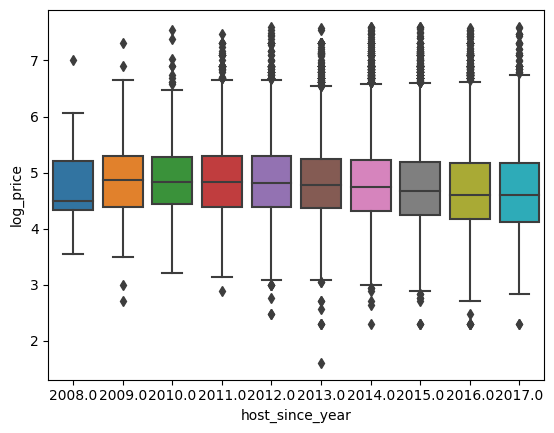

In [ ]:
sns.boxplot(x='host_since_year',y='log_price',data=df2)

In [ ]:
import matplotlib

In [ ]:
def colorFader(c1,c2,mix=0):
    c1=np.array(matplotlib.colors.to_rgb(c1))
    c2=np.array(matplotlib.colors.to_rgb(c2))
    return matplotlib.colors.to_hex((1-mix)*c1 + mix*c2)

##Análisis Exploratorio

Text(0.5, 1.0, 'Distribución del precio')

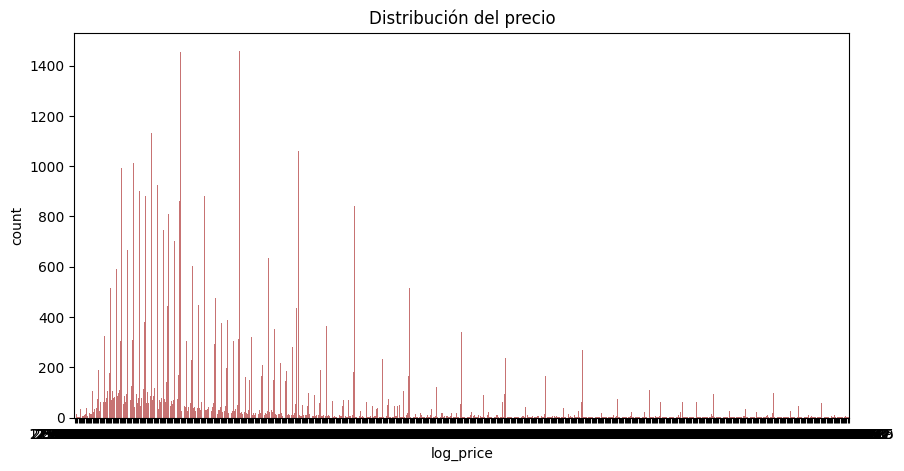

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
ax=sns.countplot(x='log_price',data=df2, color='#d56565')
plt.title('Distribución del precio')

In [ ]:
dfprices = df2[df2['log_price'] > df2['log_price'].quantile(0.5)]

Text(0.5, 1.0, 'Distribución de la proporción del precio de acuerdo al mes')

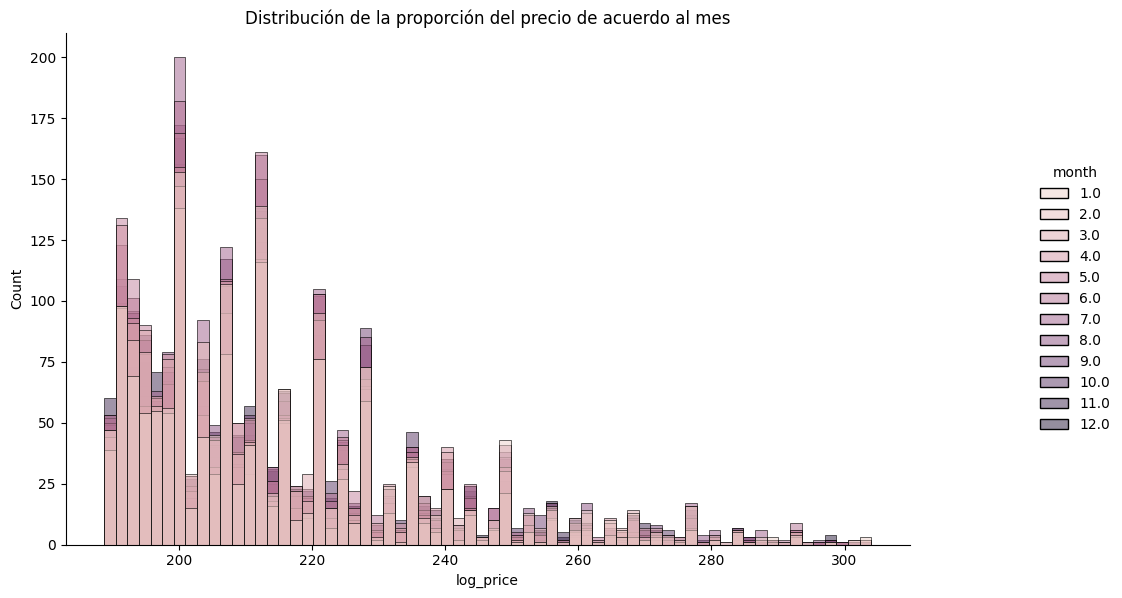

In [ ]:
sns.displot(dfprices, x=df2['log_price']*40, hue='month', color=['#81638b','#b695c0'])
plt.gcf().set_size_inches(12, 6)
plt.title('Distribución de la proporción del precio de acuerdo al mes')

In [ ]:
df2.nunique()

id                      40793
log_price                 660
Category                    3
property_type              33
room_type                   3
                        ...  
review_scores_rating       52
zipcode                   619
bedrooms                   11
beds                       17
month                      12
Length: 111, dtype: int64

Text(0.5, 1.0, 'Distribución de las ciudades por tipo de cuarto y personas permitidas')

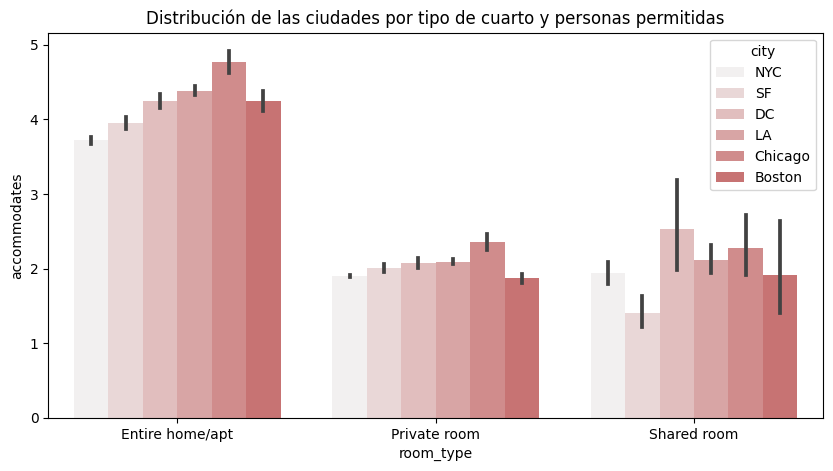

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.barplot(x='room_type', y='accommodates', hue='city', data=df2, color='#d56565')
plt.title('Distribución de las ciudades por tipo de cuarto y personas permitidas')

Text(0.5, 1.0, 'Distribución del monto de crédito por ciudad y precio')

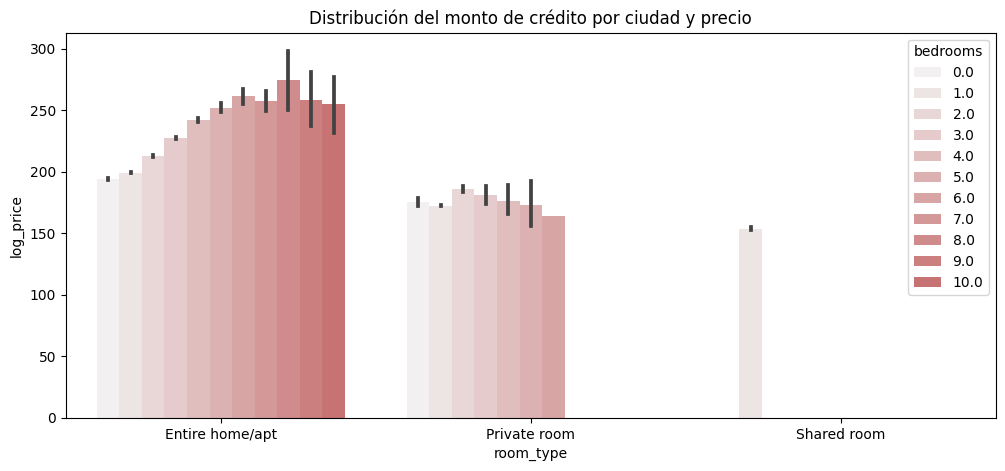

In [ ]:
f,ax=plt.subplots(1,1,figsize=(12,5))
ax = sns.barplot(x='room_type', y=df2['log_price']*40, hue='bedrooms', data=df2, color='#d56565')
plt.title('Distribución del monto de crédito por ciudad y precio')

In [ ]:
df_prices1 = df2['log_price']*40

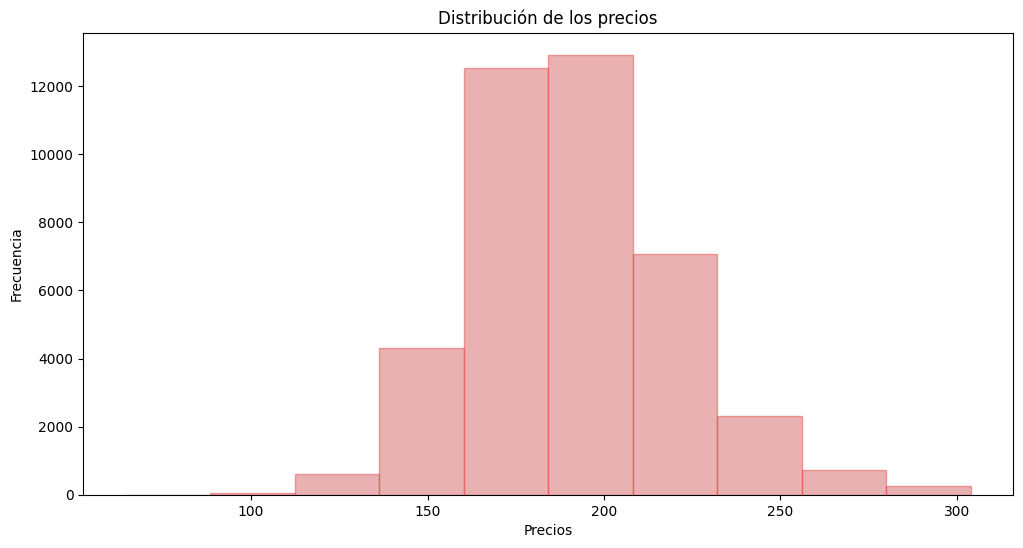

In [ ]:
df_prices1.plot.hist(alpha=0.5,color='#d56565', edgecolor='#e74a4a')
plt.xlabel('Precios')
plt.ylabel('Frecuencia')
plt.title('Distribución de los precios')
plt.gcf().set_size_inches(12, 6)

Text(0.5, 1.0, 'Distribución de la proporción del precio de acuerdo a la ciudad')

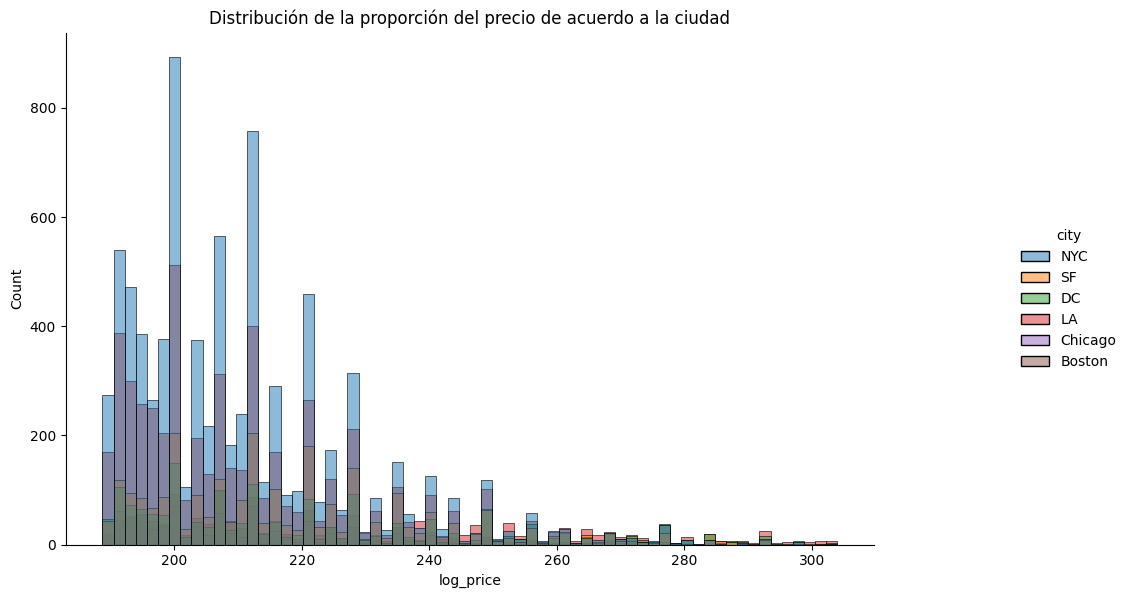

In [ ]:
sns.displot(dfprices, x=df2['log_price']*40, hue='city', color=['#d56565','#e74a4a'])
plt.gcf().set_size_inches(12, 6)
plt.title('Distribución de la proporción del precio de acuerdo a la ciudad')

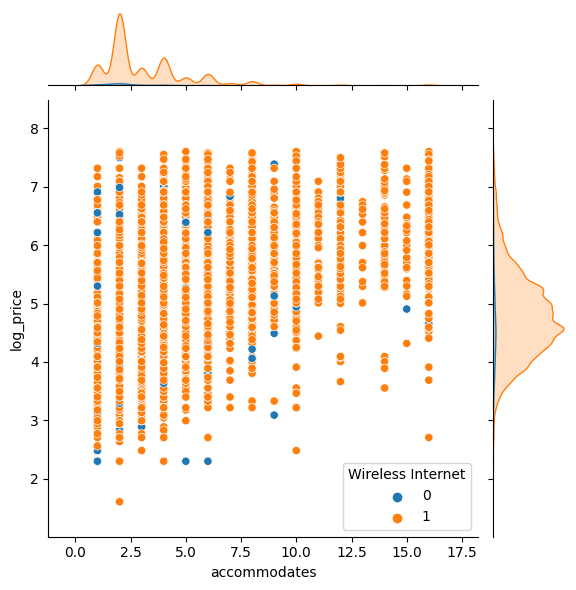

In [ ]:
sns.jointplot(data = df2, x = 'accommodates', y = 'log_price',hue='Wireless Internet')

In [ ]:
from seaborn import kdeplot
from seaborn import violinplot
from seaborn import boxplot

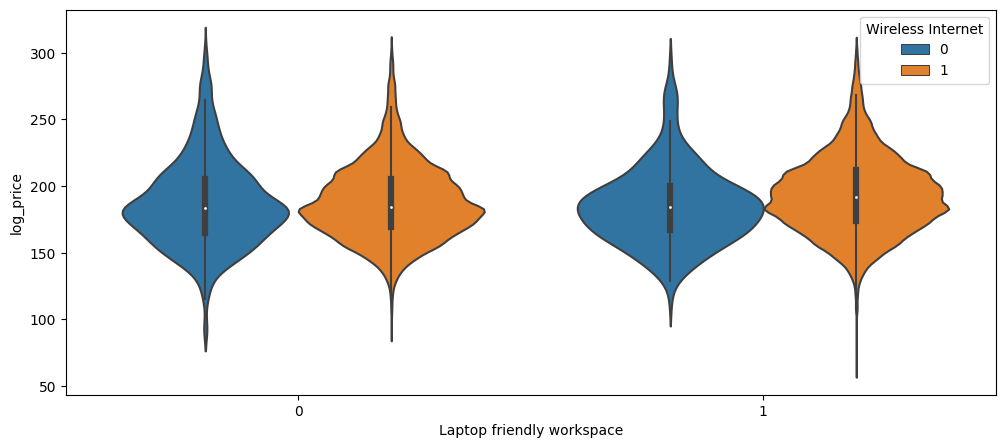

In [ ]:
f,ax=plt.subplots(1,1,figsize=(12,5))
ax=violinplot(x="Laptop friendly workspace", y=df2['log_price']*40, hue="Wireless Internet", data=df2)

## Machine Learning Supervised

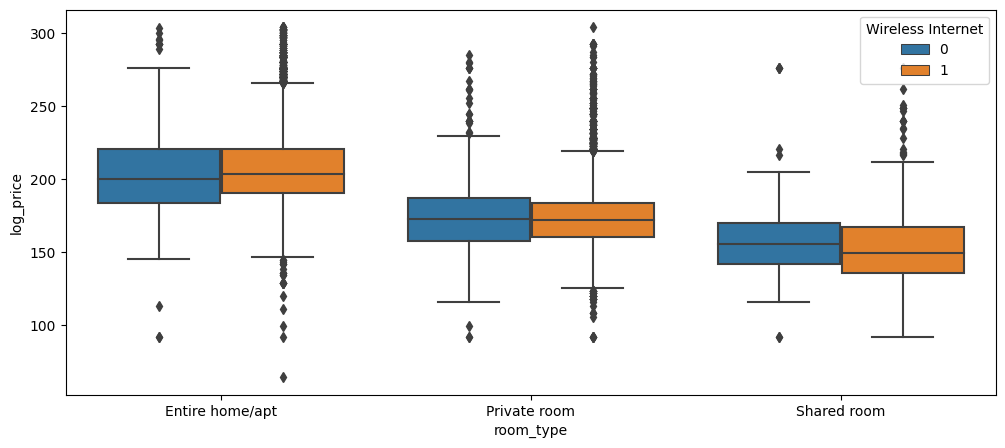

In [ ]:
f,ax=plt.subplots(1,1,figsize=(12,5))
ax=boxplot(x="room_type", y=df2['log_price']*40, hue="Wireless Internet", data=df2)

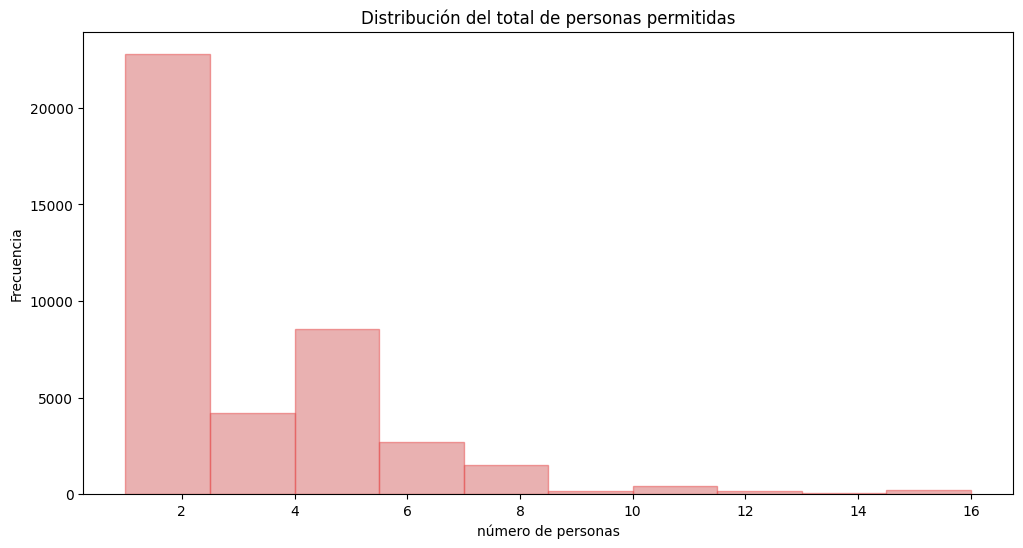

In [ ]:
df2['accommodates'].plot.hist(alpha=0.5,color='#d56565', edgecolor='#e74a4a')
plt.xlabel('número de personas')
plt.ylabel('Frecuencia')
plt.title('Distribución del total de personas permitidas')
plt.gcf().set_size_inches(12, 6)

<Axes: title={'center': 'Correlation with Response variable'}>

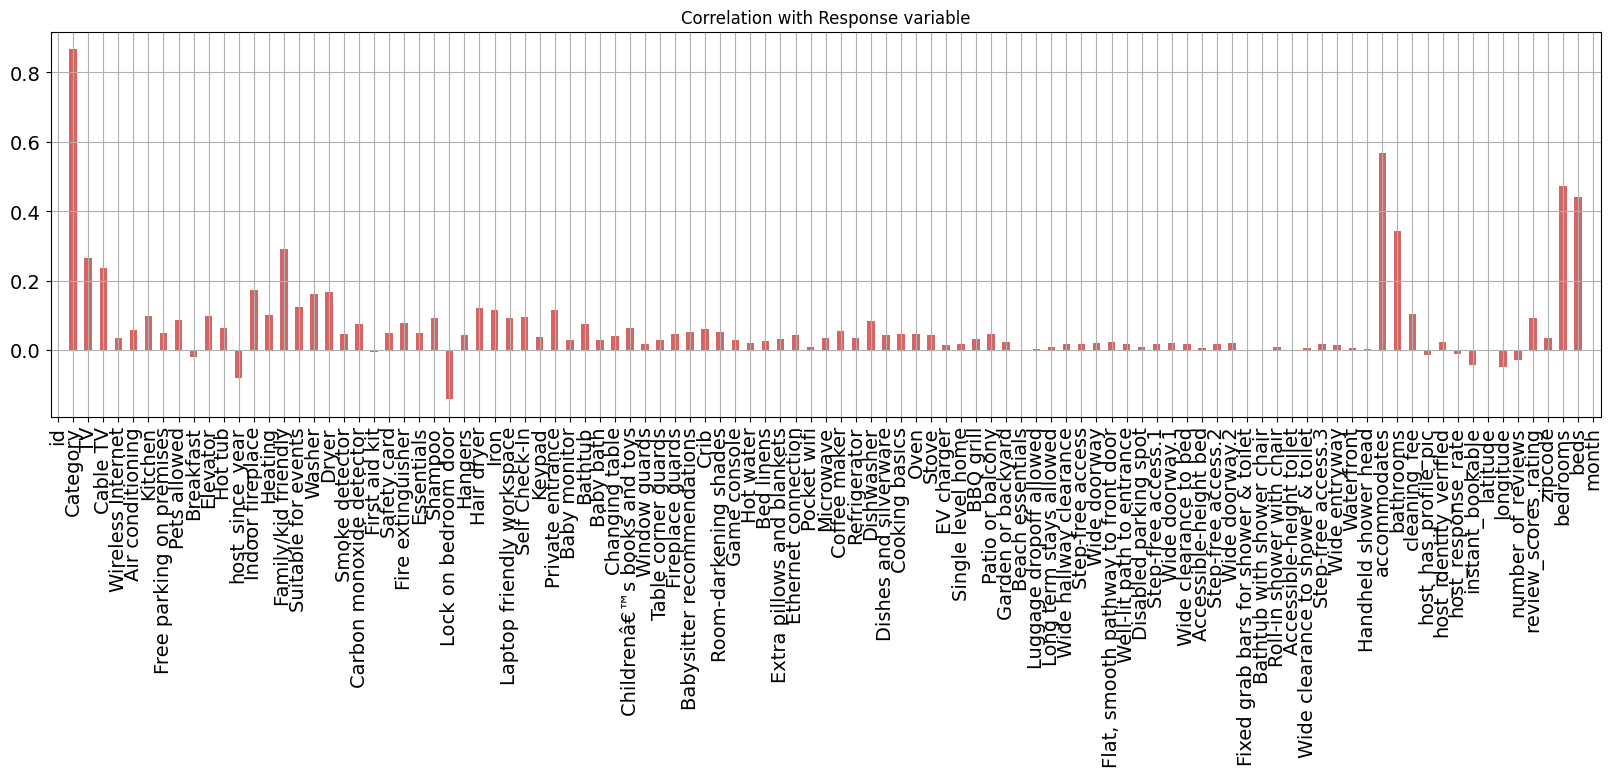

In [ ]:
df2.drop(columns = ['log_price']*40, axis=1 ).corrwith(df2['log_price']*40).plot.bar(figsize=(20,5),
              title = 'Correlation with Response variable',
              fontsize = 14, rot = 90, grid = True, color='#d56565')

In [ ]:
df3=df2.copy(deep=True)

In [ ]:
df3.drop(['host_since'],axis=1,inplace=True)

In [ ]:
df3.nunique()

id                      40793
log_price                 660
Category                    3
property_type              33
room_type                   3
                        ...  
review_scores_rating       52
zipcode                   619
bedrooms                   11
beds                       17
month                      12
Length: 110, dtype: int64

In [ ]:
df3['Category'] = df3['Category'].replace({'Bajo':0, 'Medio':1, 'Alto':2})
df3

id  log_price  Category property_type        room_type  TV  \
0       6901257   5.010635         2     Apartment  Entire home/apt   0   
1       6304928   5.129899         2     Apartment  Entire home/apt   0   
2       7919400   4.976734         2     Apartment  Entire home/apt   1   
3      13418779   6.620073         3         House  Entire home/apt   1   
4       3808709   4.744932         2     Apartment  Entire home/apt   1   
...         ...        ...       ...           ...              ...  ..   
40788  19031255   4.595120         1         House     Private room   1   
40789     54382   5.075174         2     Apartment  Entire home/apt   0   
40790  16882177   5.703782         3         House  Entire home/apt   1   
40791  15132699   5.521461         3          Loft  Entire home/apt   0   
40792   6373394   4.744932         2     Apartment  Entire home/apt   1   

       Cable TV  Wireless Internet  Air conditioning  Kitchen  ...  \
0             0                  1                 1        1  ...   
1             0                  1                 1        1  ...   
2             1                  1                 1        1  ...   
3             1                  1                 0        1  ...   
4             0                  1                 1        1  ...   
...         ...                ...               ...      ...  ...   
40788         0                  1                 1        1  ...   
40789         0                  1                 1        1  ...   
40790         0                  1                 1        1  ...   
40791         0                  1                 1        1  ...   
40792         0                  1                 0        0  ...   

       instant_bookable   latitude   longitude       neighbourhood  \
0                     0  40.696524  -73.991617    Brooklyn Heights   
1                     1  40.766115  -73.989040      Hell's Kitchen   
2                     1  40.808110  -73.943756              Harlem   
3                     0  37.772004 -122.431619        Lower Haight   
4                     1  38.925627  -77.034596    Columbia Heights   
...                 ...        ...         ...                 ...   
40788                 0  33.983187 -118.465308              Venice   
40789                 0  40.709135  -73.952358        Williamsburg   
40790                 0  34.109052 -118.008534                 NaN   
40791                 0  40.747557  -73.994368             Chelsea   
40792                 0  40.685001  -73.938863  Bedford-Stuyvesant   

       number_of_reviews  review_scores_rating  zipcode  bedrooms  beds  month  
0                      2                 100.0  11201.0       1.0   1.0    3.0  
1                      6                  93.0  10019.0       3.0   3.0    6.0  
2                     10                  92.0  10027.0       1.0   3.0   10.0  
3                      0                   NaN  94117.0       2.0   2.0    4.0  
4                      4                  40.0  20009.0       0.0   1.0    1.0  
...                  ...                   ...      ...       ...   ...    ...  
40788                 29                  90.0  90291.0       1.0   1.0    8.0  
40789                  1                 100.0  11211.0       1.0   1.0    2.0  
40790                  0                   NaN  91006.0       3.0   6.0    3.0  
40791                  1                 100.0  10001.0       1.0   1.0    5.0  
40792                  3                  80.0  11221.0       2.0   2.0    5.0  

[40793 rows x 110 columns]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df3, # predictors y target
    df3['log_price']*40,  # target, precios no logarítmicos, en MXN
    test_size=0.3)

print(X_train.shape)
print(X_test.shape)

(28555, 110)
(12238, 110)


In [ ]:
y_test.head()

37619    174.777914
7095     193.132549
21379    197.378957
35227    175.281065
35695    155.672812
Name: log_price, dtype: float64

In [ ]:
import random

In [ ]:
property_map=X_train.groupby(['property_type'])['log_price'].mean().to_dict()
property_map = {k: v + random.uniform(0, 0.000001) for k,v in property_map.items()}
property_map

{'Apartment': 4.758068901592678,
 'Bed & Breakfast': 4.62082832517618,
 'Boat': 5.508630249322282,
 'Boutique hotel': 5.118253805785032,
 'Bungalow': 4.788947813590738,
 'Cabin': 4.462521863324424,
 'Camper/RV': 4.65368068174022,
 'Casa particular': 4.382026724637646,
 'Castle': 5.836649495835679,
 'Cave': 4.828314308914215,
 'Chalet': 4.910567202303822,
 'Condominium': 5.0416700582955905,
 'Dorm': 3.7977378512793276,
 'Guest suite': 4.737515505225183,
 'Guesthouse': 4.662291634526836,
 'Hostel': 3.633303336503532,
 'House': 4.798680532096068,
 'Hut': 4.073065727387857,
 'In-law': 4.883621512297174,
 'Loft': 5.006632617834736,
 'Other': 4.936676654202341,
 'Serviced apartment': 5.290316502441535,
 'Tent': 4.1767081058885225,
 'Timeshare': 5.594315168602271,
 'Tipi': 6.052089905420667,
 'Townhouse': 4.829328025756241,
 'Train': 5.1357993105170765,
 'Treehouse': 4.050054809712205,
 'Vacation home': 5.637959244540482,
 'Villa': 5.264555994093389,
 'Yurt': 4.676948761051566}

In [ ]:
neig_map=X_train.groupby(['neighbourhood'])['log_price'].mean().to_dict()
neig_map = {k: v + random.uniform(0, 0.000001) for k,v in neig_map.items()}
neig_map

{'16th Street Heights': 4.64931567572636,
 'Adams Morgan': 4.890930089242998,
 'Alamo Square': 5.090246829644445,
 'Albany Park': 4.458666577726217,
 'Alhambra': 4.038865235735913,
 'Allerton': 3.8417827262195066,
 'Allston-Brighton': 4.398537071776612,
 'Alondra Park': 5.2730004680721425,
 'Alphabet City': 4.946804220485537,
 'Altadena': 4.697198042237963,
 'American University Park': 4.830363724759364,
 'Anacostia': 4.00261516427463,
 'Andersonville': 4.742782634829908,
 'Annadale': 4.663439329092803,
 'Arcadia': 4.686054960321857,
 'Archer Heights': 3.8127985243345446,
 'Arleta': 3.5553480671033397,
 'Armour Square': 3.8066626433902058,
 'Arrochar': 4.779124256559858,
 'Artesia': 3.9120231265394207,
 'Arts District': 4.518637801686627,
 'Astoria': 4.464106043669849,
 'Atwater Village': 4.6452708005439485,
 'Auburn Gresham': 4.4426517871163425,
 'Austin': 4.0604436559375445,
 'Avondale': 4.33521860793092,
 'Azusa': 3.7271752030004572,
 'Back Bay': 5.240492211033086,
 'Back of the Yar

In [ ]:
city_map=X_train.groupby(['city'])['log_price'].mean().to_dict()
city_map = {k: v + random.uniform(0, 0.000001) for k,v in city_map.items()}
city_map

{'Boston': 4.882631185874558,
 'Chicago': 4.6100074669563025,
 'DC': 5.013226981333899,
 'LA': 4.72559085281598,
 'NYC': 4.716598299008355,
 'SF': 5.15914967140745}

In [ ]:
cancellation_map=X_train.groupby(['cancellation_policy'])['log_price'].mean().to_dict()
cancellation_map = {k: v + random.uniform(0, 0.000001) for k,v in cancellation_map.items()}
cancellation_map

{'flexible': 4.665450500579424,
 'moderate': 4.727183280148612,
 'strict': 4.89374518641541,
 'super_strict_30': 5.519713689826789,
 'super_strict_60': 6.446158690655474}

In [ ]:
bed_map=X_train.groupby(['bed_type'])['log_price'].mean().to_dict()
bed_map = {k: v + random.uniform(0, 0.000001) for k,v in bed_map.items()}
bed_map

{'Airbed': 4.367172339826205,
 'Couch': 4.368029788958639,
 'Futon': 4.375644375746313,
 'Pull-out Sofa': 4.469460694518064,
 'Real Bed': 4.793458935622716}

In [ ]:
room_map=X_train.groupby(['room_type'])['log_price'].mean().to_dict()
room_map = {k: v + random.uniform(0, 0.000001) for k,v in room_map.items()}
room_map

{'Entire home/apt': 5.170820804379448,
 'Private room': 4.325020171077563,
 'Shared room': 3.844577026073501}

In [ ]:
X_train['property_type']

6665     Apartment
28376    Apartment
6782     Apartment
14421    Apartment
7011     Apartment
           ...    
3419     Apartment
32255    Apartment
7875     Apartment
4940     Apartment
24863        House
Name: property_type, Length: 28555, dtype: object

In [ ]:
X_train['property_type']=X_train['property_type'].map(property_map)
X_test['property_type']=X_test['property_type'].map(property_map)

In [ ]:
tipo(X_train)

Columna:  id Tipo:  int64
Columna:  log_price Tipo:  float64
Columna:  Category Tipo:  int64
Columna:  property_type Tipo:  float64
Columna:  room_type Tipo:  object
Columna:  TV Tipo:  int64
Columna:  Cable TV Tipo:  int64
Columna:  Wireless Internet Tipo:  int64
Columna:  Air conditioning Tipo:  int64
Columna:  Kitchen Tipo:  int64
Columna:  Free parking on premises Tipo:  int64
Columna:  Pets allowed Tipo:  int64
Columna:  Breakfast Tipo:  int64
Columna:  Elevator Tipo:  int64
Columna:  Hot tub Tipo:  int64
Columna:  host_since_year Tipo:  float64
Columna:  Indoor fireplace Tipo:  int64
Columna:  Heating Tipo:  int64
Columna:  Family/kid friendly Tipo:  int64
Columna:  Suitable for events Tipo:  int64
Columna:  Washer Tipo:  int64
Columna:  Dryer Tipo:  int64
Columna:  Smoke detector Tipo:  int64
Columna:  Carbon monoxide detector Tipo:  int64
Columna:  First aid kit Tipo:  int64
Columna:  Safety card Tipo:  int64
Columna:  Fire extinguisher Tipo:  int64
Columna:  Essentials Tipo:  

In [ ]:
X_train['neighbourhood']=X_train['neighbourhood'].map(neig_map)
X_test['neighbourhood']=X_test['neighbourhood'].map(neig_map)

In [ ]:
X_train['neighbourhood']

6665     5.317996
28376    4.420837
6782     4.663129
14421         NaN
7011     4.680967
           ...   
3419     5.229014
32255    4.631840
7875     5.229014
4940     4.946804
24863    4.662735
Name: neighbourhood, Length: 28555, dtype: float64

In [ ]:
X_train['city']=X_train['city'].map(city_map)
X_test['city']=X_test['city'].map(city_map)

In [ ]:
tipo(X_train)

Columna:  id Tipo:  int64
Columna:  log_price Tipo:  float64
Columna:  Category Tipo:  int64
Columna:  property_type Tipo:  float64
Columna:  room_type Tipo:  object
Columna:  TV Tipo:  int64
Columna:  Cable TV Tipo:  int64
Columna:  Wireless Internet Tipo:  int64
Columna:  Air conditioning Tipo:  int64
Columna:  Kitchen Tipo:  int64
Columna:  Free parking on premises Tipo:  int64
Columna:  Pets allowed Tipo:  int64
Columna:  Breakfast Tipo:  int64
Columna:  Elevator Tipo:  int64
Columna:  Hot tub Tipo:  int64
Columna:  host_since_year Tipo:  float64
Columna:  Indoor fireplace Tipo:  int64
Columna:  Heating Tipo:  int64
Columna:  Family/kid friendly Tipo:  int64
Columna:  Suitable for events Tipo:  int64
Columna:  Washer Tipo:  int64
Columna:  Dryer Tipo:  int64
Columna:  Smoke detector Tipo:  int64
Columna:  Carbon monoxide detector Tipo:  int64
Columna:  First aid kit Tipo:  int64
Columna:  Safety card Tipo:  int64
Columna:  Fire extinguisher Tipo:  int64
Columna:  Essentials Tipo:  

In [ ]:
X_train['bed_type']=X_train['bed_type'].map(bed_map)
X_test['bed_type']=X_test['bed_type'].map(bed_map)
X_train['cancellation_policy']=X_train['cancellation_policy'].map(cancellation_map)
X_test['cancellation_policy']=X_test['cancellation_policy'].map(cancellation_map)

In [ ]:
X_train['room_type']=X_train['room_type'].map(room_map)
X_test['room_type']=X_test['room_type'].map(room_map)

In [ ]:
nulos(X_train)

+------------------------------+---------------------+
|Nombre                        |Promedio             |
+------------------------------+---------------------+
|id                            |                0.00|
+------------------------------+---------------------+
|log_price                     |                0.00|
+------------------------------+---------------------+
|Category                      |                0.00|
+------------------------------+---------------------+
|property_type                 |                0.00|
+------------------------------+---------------------+
|room_type                     |                0.00|
+------------------------------+---------------------+
|TV                            |                0.00|
+------------------------------+---------------------+
|Cable TV                      |                0.00|
+------------------------------+---------------------+
|Wireless Internet             |                0.00|
+-----------------

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=16)
imputer.fit(X_train)

X_train = pd.DataFrame(imputer.transform(X_train), columns = df3.columns )
X_test = pd.DataFrame(imputer.transform(X_test), columns = df3.columns )

In [ ]:
 X_train.head()

id  log_price  Category  property_type  room_type   TV  Cable TV  \
0   4887154.0   4.941642       2.0       4.758069   5.170821  1.0       0.0   
1  16725685.0   3.663562       1.0       4.758069   4.325020  0.0       0.0   
2   3201115.0   4.700480       1.0       4.758069   5.170821  1.0       0.0   
3   1342507.0   5.521461       3.0       4.758069   5.170821  1.0       1.0   
4    592831.0   5.164786       2.0       4.758069   5.170821  1.0       1.0   

   Wireless Internet  Air conditioning  Kitchen  ...  instant_bookable  \
0                1.0               0.0      1.0  ...               0.0   
1                1.0               0.0      1.0  ...               0.0   
2                1.0               0.0      1.0  ...               0.0   
3                1.0               1.0      1.0  ...               0.0   
4                1.0               1.0      1.0  ...               0.0   

    latitude   longitude  neighbourhood  number_of_reviews  \
0  33.976424 -118.462721       5.317996                1.0   
1  40.689637  -73.948845       4.420837                0.0   
2  34.073950 -118.252972       4.663129                6.0   
3  41.887305  -87.632645       4.645578                2.0   
4  40.691348  -73.958593       4.680967               25.0   

   review_scores_rating  zipcode  bedrooms  beds  month  
0              100.0000  90292.0       2.0   2.0    4.0  
1               94.3125  11216.0       1.0   1.0    6.0  
2               93.0000  90026.0       2.0   2.0    6.0  
3              100.0000  60601.0       2.0   3.0   10.0  
4              100.0000  11205.0       1.0   1.0   11.0  

[5 rows x 110 columns]

In [ ]:
nulos(X_test)

+------------------------------+---------------------+
|Nombre                        |Promedio             |
+------------------------------+---------------------+
|id                            |                0.00|
+------------------------------+---------------------+
|log_price                     |                0.00|
+------------------------------+---------------------+
|Category                      |                0.00|
+------------------------------+---------------------+
|property_type                 |                0.00|
+------------------------------+---------------------+
|room_type                     |                0.00|
+------------------------------+---------------------+
|TV                            |                0.00|
+------------------------------+---------------------+
|Cable TV                      |                0.00|
+------------------------------+---------------------+
|Wireless Internet             |                0.00|
+-----------------

In [ ]:
nulos(X_train)

+------------------------------+---------------------+
|Nombre                        |Promedio             |
+------------------------------+---------------------+
|id                            |                0.00|
+------------------------------+---------------------+
|log_price                     |                0.00|
+------------------------------+---------------------+
|Category                      |                0.00|
+------------------------------+---------------------+
|property_type                 |                0.00|
+------------------------------+---------------------+
|room_type                     |                0.00|
+------------------------------+---------------------+
|TV                            |                0.00|
+------------------------------+---------------------+
|Cable TV                      |                0.00|
+------------------------------+---------------------+
|Wireless Internet             |                0.00|
+-----------------

In [ ]:
X_train.drop(['id', 'log_price'], axis=1, inplace=True)
X_test.drop(['id', 'log_price'], axis=1, inplace=True)
X_train.drop(['Category'],axis=1,inplace=True)
X_test.drop(['Category'],axis=1,inplace=True)
X_train.head(2)

property_type  room_type   TV  Cable TV  Wireless Internet  \
0       4.758069   5.170821  1.0       0.0                1.0   
1       4.758069   4.325020  0.0       0.0                1.0   

   Air conditioning  Kitchen  Free parking on premises  Pets allowed  \
0               0.0      1.0                       1.0           1.0   
1               0.0      1.0                       1.0           0.0   

   Breakfast  ...  instant_bookable   latitude   longitude  neighbourhood  \
0        0.0  ...               0.0  33.976424 -118.462721       5.317996   
1        0.0  ...               0.0  40.689637  -73.948845       4.420837   

   number_of_reviews  review_scores_rating  zipcode  bedrooms  beds  month  
0                1.0              100.0000  90292.0       2.0   2.0    4.0  
1                0.0               94.3125  11216.0       1.0   1.0    6.0  

[2 rows x 107 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns )
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns )

In [ ]:
X_train.head()

property_type  room_type        TV  Cable TV  Wireless Internet  \
0      -0.248567   0.877105  0.647374 -0.694699           0.197691   
1      -0.248567  -1.033647 -1.544701 -0.694699           0.197691   
2      -0.248567   0.877105  0.647374 -0.694699           0.197691   
3      -0.248567   0.877105  0.647374  1.439473           0.197691   
4      -0.248567   0.877105  0.647374  1.439473           0.197691   

   Air conditioning   Kitchen  Free parking on premises  Pets allowed  \
0         -1.707139  0.308672                  1.464522      2.508733   
1         -1.707139  0.308672                  1.464522     -0.398608   
2         -1.707139  0.308672                  1.464522      2.508733   
3          0.585775  0.308672                 -0.682817     -0.398608   
4          0.585775  0.308672                 -0.682817     -0.398608   

   Breakfast  ...  instant_bookable  latitude  longitude  neighbourhood  \
0  -0.356507  ...         -0.601367 -1.452666  -1.201727       1.466664   
1  -0.356507  ...         -0.601367  0.726571   0.849043      -1.094106   
2  -0.356507  ...         -0.601367 -1.421007  -1.192064      -0.402530   
3   2.804998  ...         -0.601367  1.115357   0.218625      -0.452625   
4  -0.356507  ...         -0.601367  0.727126   0.848594      -0.351614   

   number_of_reviews  review_scores_rating   zipcode  bedrooms      beds  \
0          -0.525410              0.853201  1.180600  0.861340  0.226845   
1          -0.551449              0.035661 -0.875187 -0.309191 -0.563626   
2          -0.395217             -0.153003  1.173685  0.861340  0.226845   
3          -0.499371              0.853201  0.408705  0.861340  1.017316   
4           0.099519              0.853201 -0.875473 -0.309191 -0.563626   

      month  
0 -0.739505  
1 -0.145722  
2 -0.145722  
3  1.041845  
4  1.338737  

[5 rows x 107 columns]

In [ ]:
y_train.head()

6665     197.665697
28376    146.542466
6782     188.019215
14421    220.858437
7011     206.591439
Name: log_price, dtype: float64

## Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
modelLinear = LinearRegression().fit(X_train, y_train)
predLin = modelLinear.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df_Performance = pd.DataFrame({'MAE':[mean_absolute_error(y_test,predLin)],
                               'RMSE':[np.sqrt(mean_squared_error(y_test,predLin))],
                               'r2.score':[r2_score(y_test,predLin)]}, index=['Linear Regression'])
df_Performance

MAE       RMSE  r2.score
Linear Regression  12.466012  17.014884  0.647474

In [ ]:
columnass=X_train.columns.tolist()

In [ ]:
columnass.append(y_train.name)

In [ ]:
len(columnass)

108

In [ ]:
datos_train=pd.DataFrame(np.column_stack((X_train,y_train)),columns=columnass)

In [ ]:
datos_train

property_type  room_type        TV  Cable TV  Wireless Internet  \
0          -0.248567   0.877105  0.647374 -0.694699           0.197691   
1          -0.248567  -1.033647 -1.544701 -0.694699           0.197691   
2          -0.248567   0.877105  0.647374 -0.694699           0.197691   
3          -0.248567   0.877105  0.647374  1.439473           0.197691   
4          -0.248567   0.877105  0.647374  1.439473           0.197691   
...              ...        ...       ...       ...                ...   
28550      -0.248567   0.877105  0.647374 -0.694699           0.197691   
28551      -0.248567  -1.033647  0.647374  1.439473           0.197691   
28552      -0.248567   0.877105  0.647374  1.439473           0.197691   
28553      -0.248567   0.877105 -1.544701 -0.694699           0.197691   
28554       0.163494  -1.033647  0.647374 -0.694699           0.197691   

       Air conditioning   Kitchen  Free parking on premises  Pets allowed  \
0             -1.707139  0.308672                  1.464522      2.508733   
1             -1.707139  0.308672                  1.464522     -0.398608   
2             -1.707139  0.308672                  1.464522      2.508733   
3              0.585775  0.308672                 -0.682817     -0.398608   
4              0.585775  0.308672                 -0.682817     -0.398608   
...                 ...       ...                       ...           ...   
28550          0.585775 -3.239687                 -0.682817     -0.398608   
28551          0.585775  0.308672                  1.464522     -0.398608   
28552          0.585775  0.308672                 -0.682817     -0.398608   
28553          0.585775  0.308672                 -0.682817     -0.398608   
28554          0.585775  0.308672                 -0.682817     -0.398608   

       Breakfast  ...  latitude  longitude  neighbourhood  number_of_reviews  \
0      -0.356507  ... -1.452666  -1.201727       1.466664          -0.525410   
1      -0.356507  ...  0.726571   0.849043      -1.094106          -0.551449   
2      -0.356507  ... -1.421007  -1.192064      -0.402530          -0.395217   
3       2.804998  ...  1.115357   0.218625      -0.452625          -0.499371   
4      -0.356507  ...  0.727126   0.848594      -0.351614           0.099519   
...          ...  ...       ...        ...            ...                ...   
28550   2.804998  ...  0.743302   0.846612       1.212681          -0.551449   
28551  -0.356507  ...  0.738305   0.849357      -0.491838          -0.551449   
28552  -0.356507  ...  0.746177   0.847047       1.212681           0.802564   
28553  -0.356507  ...  0.737838   0.847739       0.407168          -0.343139   
28554  -0.356507  ... -1.434773  -1.198615      -0.403655          -0.551449   

       review_scores_rating   zipcode  bedrooms      beds     month  \
0                  0.853201  1.180600  0.861340  0.226845 -0.739505   
1                  0.035661 -0.875187 -0.309191 -0.563626 -0.145722   
2                 -0.153003  1.173685  0.861340  0.226845 -0.145722   
3                  0.853201  0.408705  0.861340  1.017316  1.041845   
4                  0.853201 -0.875473 -0.309191 -0.563626  1.338737   
...                     ...       ...       ...       ...       ...   
28550             -0.242842 -0.906514 -1.479723  0.226845 -1.036397   
28551              0.296195 -0.875031 -0.309191 -0.563626  1.635629   
28552              0.134484 -0.906774 -1.479723 -0.563626 -1.036397   
28553             -0.153003 -0.906566  0.861340  0.226845  1.635629   
28554             -0.341666  1.173893 -0.309191 -0.563626 -0.145722   

        log_price  
0      197.665697  
1      146.542466  
2      188.019215  
3      220.858437  
4      206.591439  
...           ...  
28550  196.210991  
28551  179.545455  
28552  207.495432  
28553  207.718274  
28554  176.268770  

[28555 rows x 108 columns]

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

### ANOVA

In [ ]:
X_trainn1=sm.add_constant(X_train,prepend=True)
mlineal=sm.OLS(endog=y_train.values.reshape(-1,1),exog=X_trainn1,)
mlineal=mlineal.fit()
print(mlineal.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     537.6
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        16:03:19   Log-Likelihood:            -1.2114e+05
No. Observations:               28555   AIC:                         2.425e+05
Df Residuals:                   28452   BIC:                         2.433e+05
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

## Análisis de residuos

### Cálculo de residuos y estandarización

In [ ]:
y_t=y_train.values.flatten()
prediccion_train=mlineal.predict(exog=X_trainn1)
residuosl1_train=prediccion_train-y_t

In [ ]:
from statistics import pstdev
S1=pstdev(residuosl1_train)

In [ ]:
STDRESL1=residuosl1_train/S1

### Visualización gráfica de los residuos

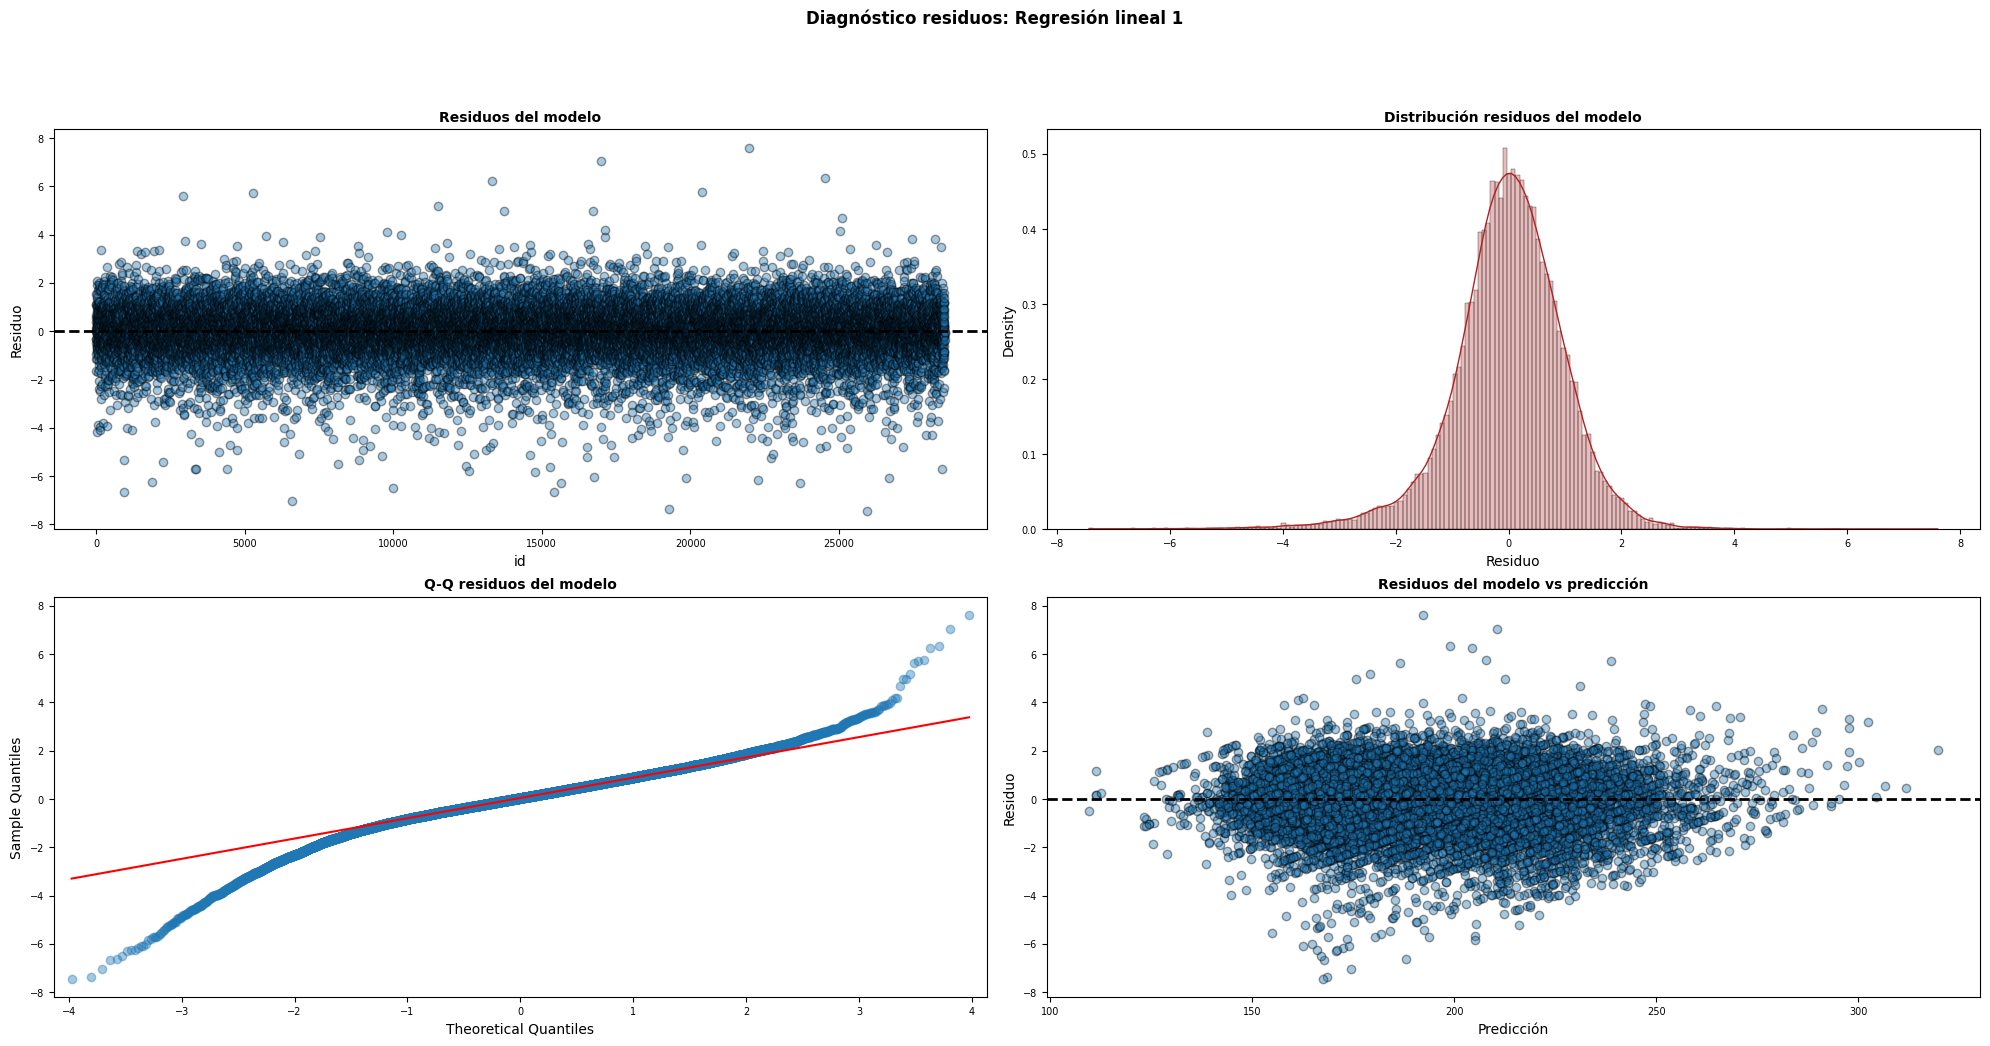

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

axes[0, 0].scatter(list(range(len(y_t))), STDRESL1,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 0].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('id')
axes[0, 0].set_ylabel('Residuo')
axes[0, 0].tick_params(labelsize = 7)

sns.histplot(
    data    = STDRESL1,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[0, 1]
)
axes[0, 1].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[0, 1].set_xlabel("Residuo")
axes[0, 1].tick_params(labelsize = 7)

sm.qqplot(
    STDRESL1,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 0], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 0].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 0].tick_params(labelsize = 7)

axes[1, 1].scatter(prediccion_train, STDRESL1,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[1, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1, 1].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[1, 1].set_xlabel('Predicción')
axes[1, 1].set_ylabel('Residuo')
axes[1, 1].tick_params(labelsize = 7)
# Se eliminan los axes vacíos
fig.delaxes(axes[2,0])
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos: Regresión lineal 1', fontsize = 12, fontweight = "bold");

### Prueba de normalidad de los residuos

Text(0.5, 0, 'Residuos estandarizados')

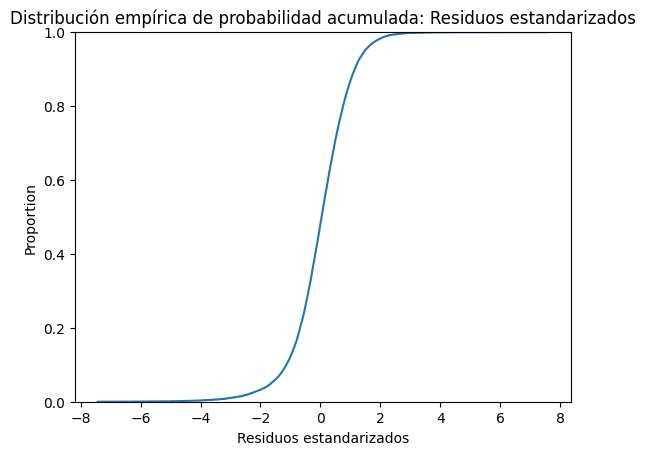

In [ ]:
chart=sns.ecdfplot(x=STDRESL1)
chart.set_title('Distribución empírica de probabilidad acumulada: Residuos estandarizados')
chart.set_xlabel('Residuos estandarizados')

In [ ]:
import scipy.stats as stats 
estadistico,p_value=stats.shapiro(STDRESL1)
print(f"Estadístico: {estadistico}, p_value: {p_value}")

Estadístico: 0.9644433856010437, p_value: 0.0


In [ ]:
from scipy.stats import kstest
kstest(STDRESL1,stats.norm.cdf)

KstestResult(statistic=0.051491873643632724, pvalue=3.0619204312188073e-66, statistic_location=-0.5512988113049463, statistic_sign=-1)

###### Por lo tanto, no existe normalidad en los residuos

### Recursive Feature Elimination on Linear Regression

### ¡No correr!

In [ ]:
##from sklearn.feature_selection import RFE
##regression = LinearRegression()
##rfe = RFE(regression, step = 1)
##rfe = rfe.fit(X_train, y_train)
##columns=X_train.columns[rfe.support_].tolist()

In [ ]:
##columns

['property_type',
 'room_type',
 'TV',
 'Cable TV',
 'Wireless Internet',
 'Air conditioning',
 'Kitchen',
 'Pets allowed',
 'Breakfast',
 'Elevator',
 'Hot tub',
 'host_since_year',
 'Indoor fireplace',
 'Family/kid friendly',
 'Suitable for events',
 'Washer',
 'Smoke detector',
 'Carbon monoxide detector',
 'Lock on bedroom door',
 'Hangers',
 'Hair dryer',
 'Self Check-In',
 'Private entrance',
 'Baby bath',
 'Babysitter recommendations',
 'Refrigerator',
 'Dishwasher',
 'Dishes and silverware',
 'Oven',
 'Stove',
 'Step-free access',
 'Wide doorway',
 'Step-free access.1',
 'Wide doorway.1',
 'Step-free access.2',
 'Wide doorway.2',
 'Step-free access.3',
 'accommodates',
 'bathrooms',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'host_identity_verified',
 'host_response_rate',
 'instant_bookable',
 'latitude',
 'longitude',
 'neighbourhood',
 'number_of_reviews',
 'review_scores_rating',
 'zipcode',
 'bedrooms',
 'beds']

In [ ]:
columnss=['property_type',
 'room_type',
 'TV',
 'Cable TV',
 'Wireless Internet',
 'Air conditioning',
 'Kitchen',
 'Pets allowed',
 'Breakfast',
 'Elevator',
 'Hot tub',
 'host_since_year',
 'Indoor fireplace',
 'Family/kid friendly',
 'Suitable for events',
 'Washer',
 'Smoke detector',
 'Carbon monoxide detector',
 'Lock on bedroom door',
 'Hangers',
 'Hair dryer',
 'Self Check-In',
 'Private entrance',
 'Baby bath',
 'Babysitter recommendations',
 'Refrigerator',
 'Dishwasher',
 'Dishes and silverware',
 'Oven',
 'Stove',
 'Step-free access',
 'Wide doorway',
 'Step-free access.1',
 'Wide doorway.1',
 'Step-free access.2',
 'Wide doorway.2',
 'Step-free access.3',
 'accommodates',
 'bathrooms',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'host_identity_verified',
 'host_response_rate',
 'instant_bookable',
 'latitude',
 'longitude',
 'neighbourhood',
 'number_of_reviews',
 'review_scores_rating',
 'zipcode',
 'bedrooms',
 'beds']

In [ ]:
X_train1=X_train[columnss]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train1, # predictors y target
    y_train,  # target
    test_size=0.3)

print(X_train.shape)
print(X_test.shape)

(19988, 53)
(8567, 53)


In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [ ]:
modelLinear2 = LinearRegression().fit(X_train, y_train)
predLin2 = modelLinear2.predict(X_test)
df_Temp = pd.DataFrame({'MAE':[mean_absolute_error(y_test,predLin2)],
                               'RMSE':[np.sqrt(mean_squared_error(y_test,predLin2))],
                               'r2.score':[r2_score(y_test,predLin2)]}, index=['Linear Regression 2'])
df_Performance = df_Performance.append(df_Temp)
df_Performance

MAE       RMSE  r2.score
Linear Regression    12.466012  17.014884  0.647474
Linear Regression 2  12.306573  16.608157  0.666930

## ANOVA

In [ ]:
X_trainn2=sm.add_constant(X_train,prepend=True)
mlineal2=sm.OLS(endog=y_train.values.reshape(-1,1),exog=X_trainn2,)
mlineal2=mlineal2.fit()
print(mlineal2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     779.6
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        16:05:47   Log-Likelihood:                -84976.
No. Observations:               19988   AIC:                         1.700e+05
Df Residuals:                   19939   BIC:                         1.704e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### Análisis de residuos y estandarización

In [ ]:
y_t2=y_train.values.flatten()
prediccion2_train=mlineal2.predict(exog=X_trainn2)
residuosl2_train=prediccion2_train-y_t2

In [ ]:
S2=pstdev(residuosl2_train)

In [ ]:
STDRESL2=residuosl2_train/S2

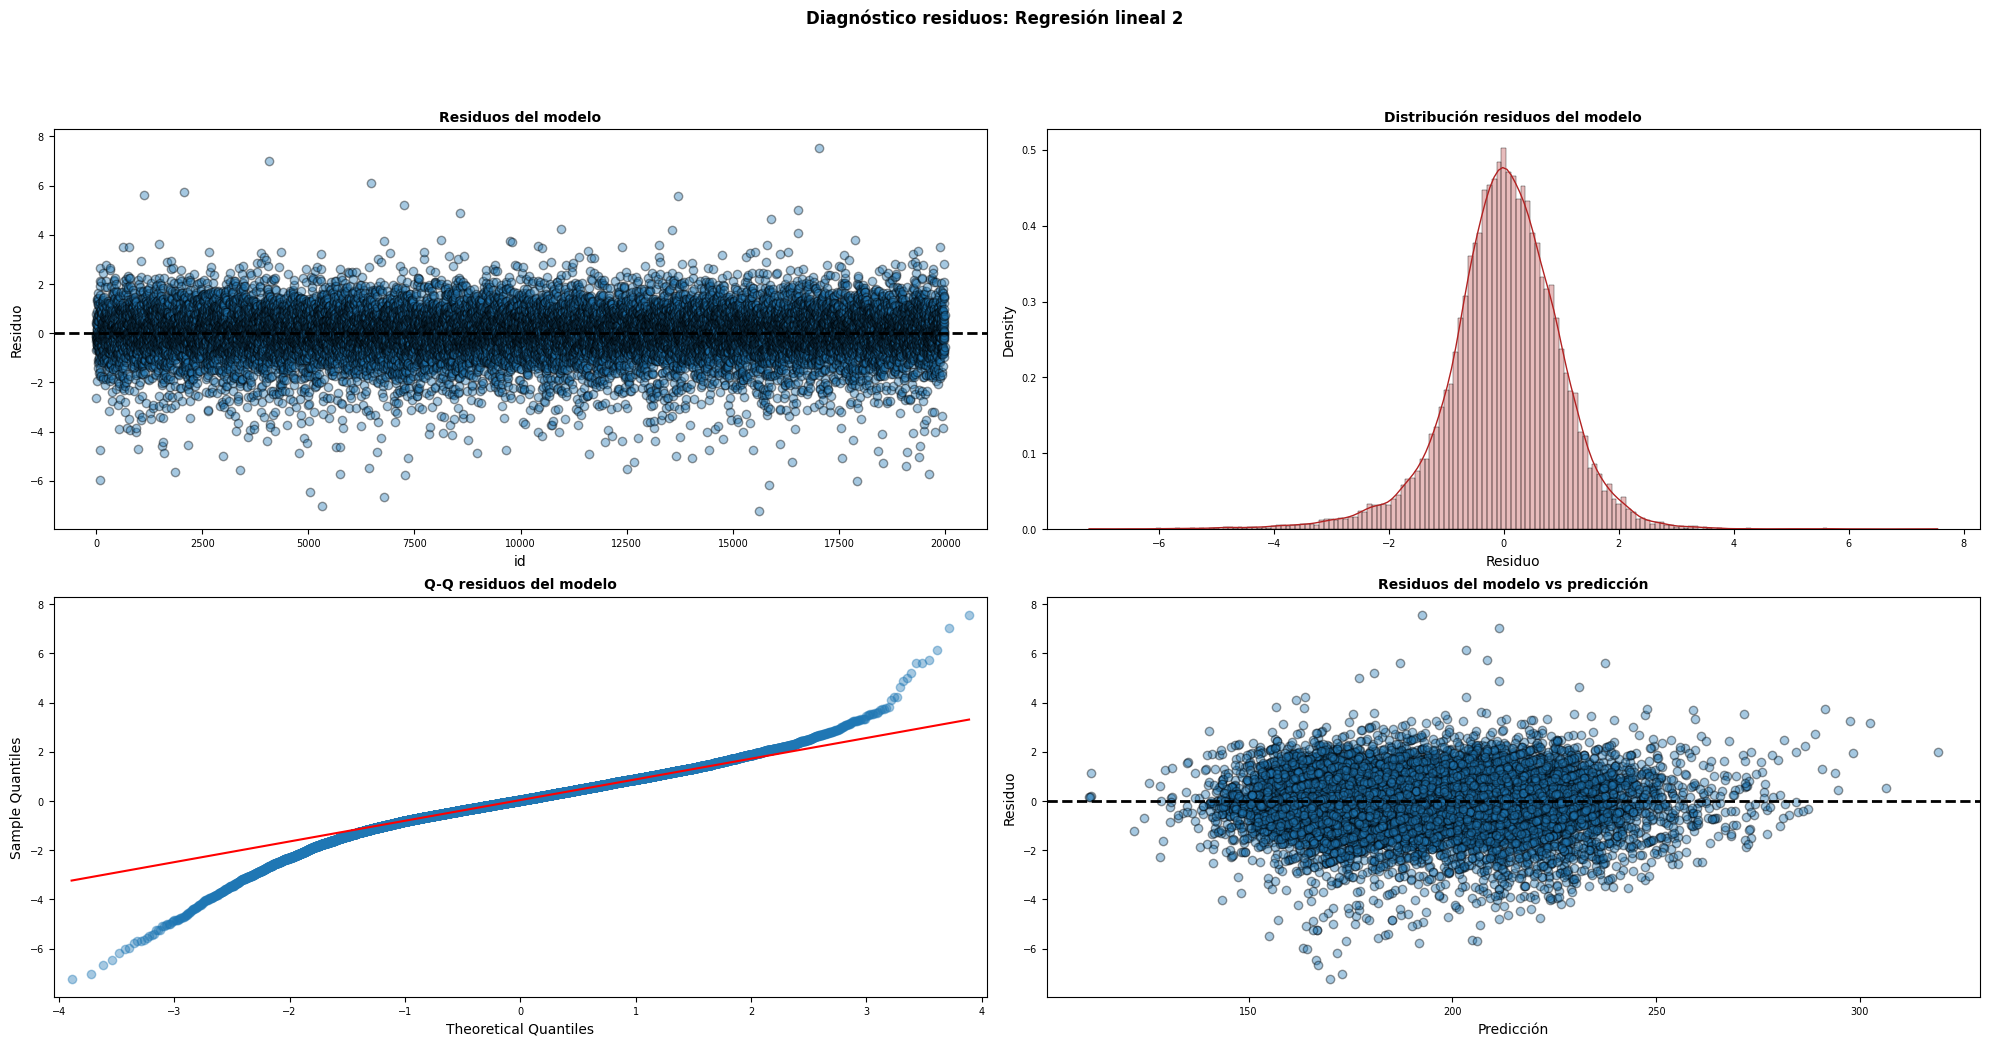

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

axes[0, 0].scatter(list(range(len(y_t2))), STDRESL2,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 0].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('id')
axes[0, 0].set_ylabel('Residuo')
axes[0, 0].tick_params(labelsize = 7)

sns.histplot(
    data    = STDRESL2,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[0, 1]
)
axes[0, 1].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[0, 1].set_xlabel("Residuo")
axes[0, 1].tick_params(labelsize = 7)

sm.qqplot(
    STDRESL2,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 0], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 0].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 0].tick_params(labelsize = 7)

axes[1, 1].scatter(prediccion2_train, STDRESL2,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[1, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1, 1].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[1, 1].set_xlabel('Predicción')
axes[1, 1].set_ylabel('Residuo')
axes[1, 1].tick_params(labelsize = 7)
# Se eliminan los axes vacíos
fig.delaxes(axes[2,0])
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos: Regresión lineal 2', fontsize = 12, fontweight = "bold");

### Prueba de normalidad de los residuos

Text(0.5, 0, 'Residuos estandarizados')

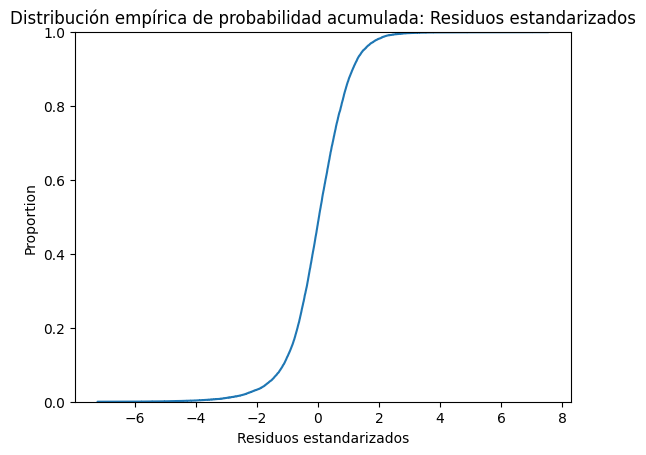

In [ ]:
chart=sns.ecdfplot(x=STDRESL2)
chart.set_title('Distribución empírica de probabilidad acumulada: Residuos estandarizados')
chart.set_xlabel('Residuos estandarizados')

In [ ]:
import scipy.stats as stats 
estadistico,p_value=stats.shapiro(STDRESL2)
print(f"Estadístico: {estadistico}, p_value: {p_value}")

Estadístico: 0.9643886685371399, p_value: 0.0


In [ ]:
kstest(STDRESL2,stats.norm.cdf)

KstestResult(statistic=0.05203884831274236, pvalue=1.749292363408436e-47, statistic_location=-0.6182097068608017, statistic_sign=-1)

In [ ]:
sig_colums=['property_type',
 'room_type',
 'TV',
 'Cable TV',
 'Wireless Internet',
 'Air conditioning',
 'Kitchen',
 'Breakfast',
 'Elevator',
 'Hot tub',
 'host_since_year',
 'Indoor fireplace',
 'Family/kid friendly',
 'Suitable for events',
 'Hangers',
 'Hair dryer',
 'Self Check-In',
 'Baby bath',
 'Dishwasher',
 'accommodates',
 'bathrooms',
 'cleaning_fee',
 'city',
 'host_identity_verified',
 'host_response_rate',
 'instant_bookable',
 'latitude',
 'longitude',
 'neighbourhood',
 'number_of_reviews',
 'review_scores_rating',
 'zipcode',
 'bedrooms',
 'beds']

In [ ]:
modelLinear3 = LinearRegression().fit(X_train[sig_colums], y_train)
predLin3 = modelLinear3.predict(X_test[sig_colums])
df_Temp = pd.DataFrame({'MAE':[mean_absolute_error(y_test,predLin3)],
                               'RMSE':[np.sqrt(mean_squared_error(y_test,predLin3))],
                               'r2.score':[r2_score(y_test,predLin3)]}, index=['Linear Regression 3'])
df_Performance = df_Performance.append(df_Temp)
df_Performance

MAE       RMSE  r2.score
Linear Regression    12.466012  17.014884  0.647474
Linear Regression 2  12.306573  16.608157  0.666930
Linear Regression 3  12.311236  16.605940  0.667019

In [ ]:
X_trainn3=sm.add_constant(X_train[sig_colums],prepend=True)
mlineal3=sm.OLS(endog=y_train.values.reshape(-1,1),exog=X_trainn3,)
mlineal3=mlineal3.fit()
print(mlineal3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     1099.
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        16:07:03   Log-Likelihood:                -84988.
No. Observations:               19988   AIC:                         1.700e+05
Df Residuals:                   19953   BIC:                         1.703e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    191

In [ ]:
y_t3=y_train.values.flatten()
prediccion3_train=mlineal3.predict(exog=X_trainn3)
residuosl3_train=prediccion3_train-y_t3

In [ ]:
S3=pstdev(residuosl3_train)

In [ ]:
STDRESL3=residuosl3_train/S3

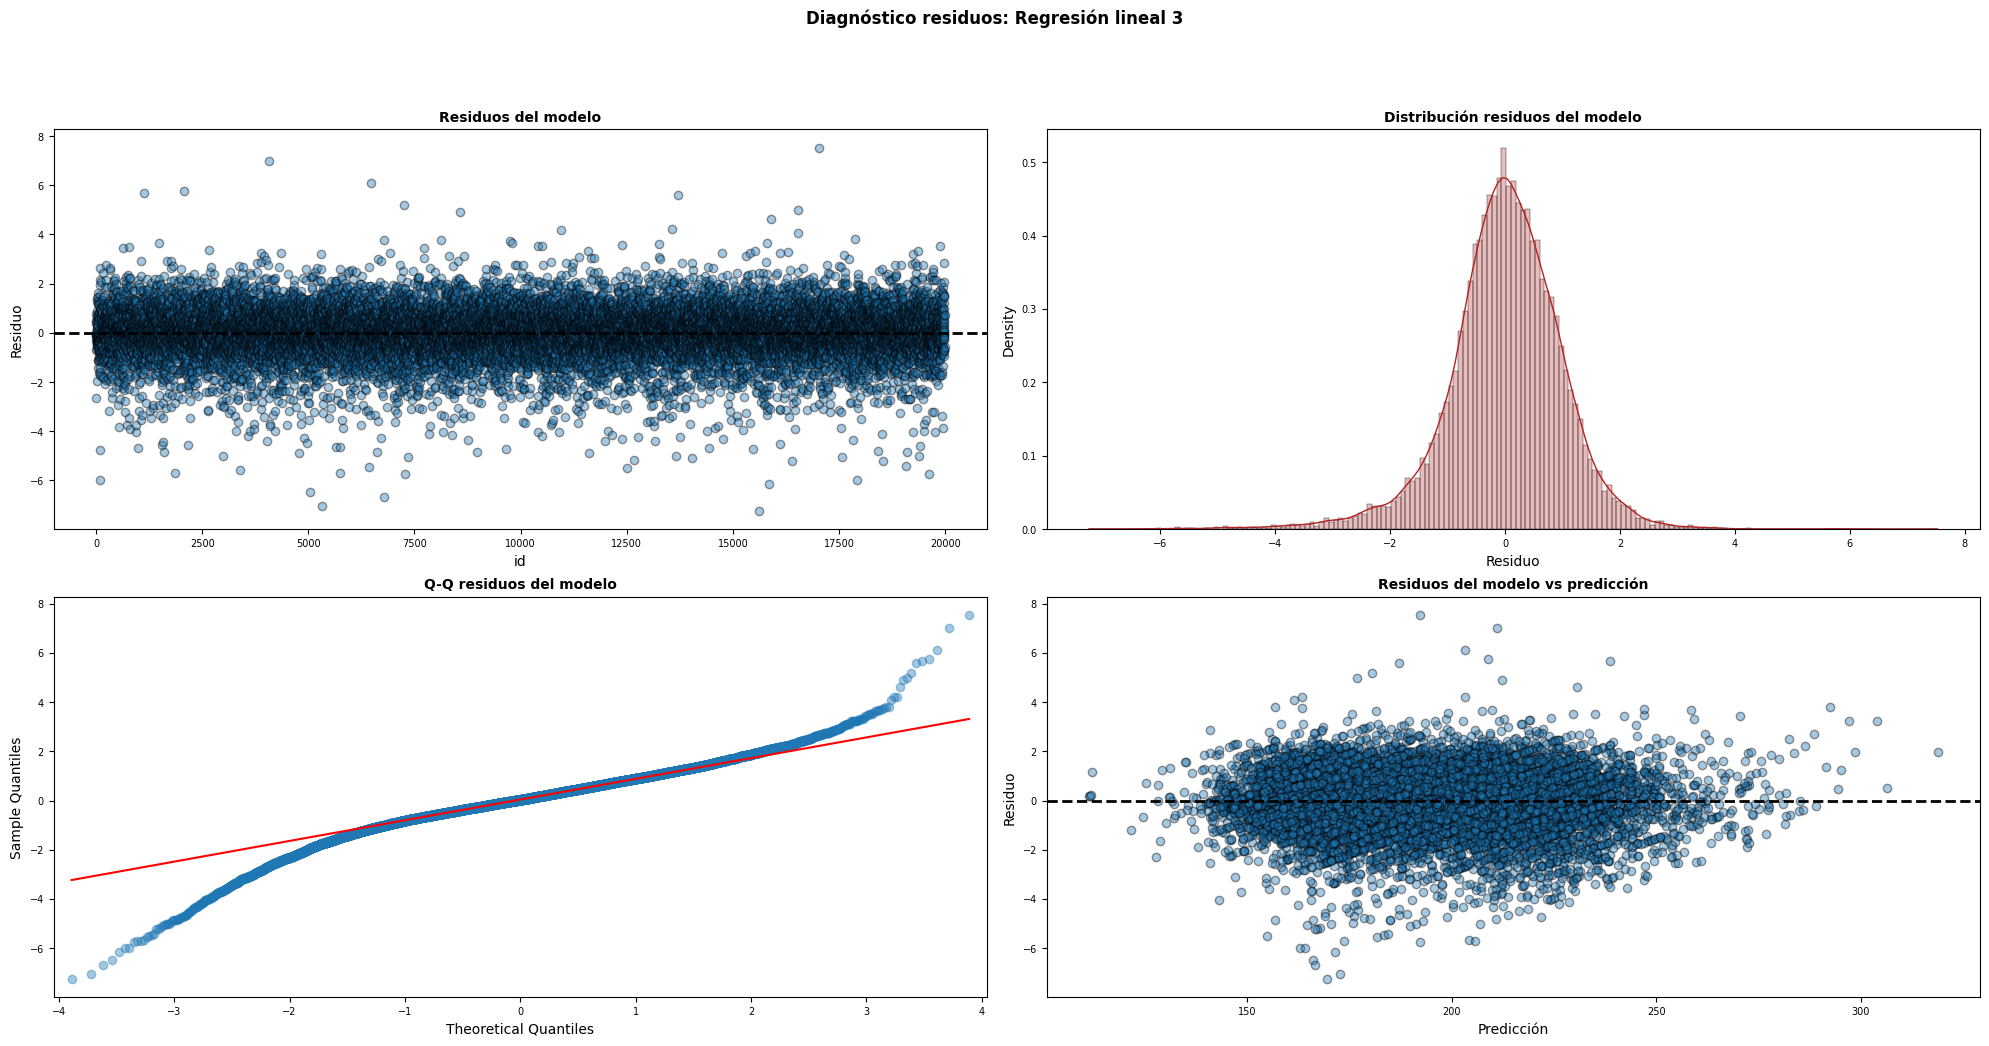

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

axes[0, 0].scatter(list(range(len(y_t3))), STDRESL3,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 0].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('id')
axes[0, 0].set_ylabel('Residuo')
axes[0, 0].tick_params(labelsize = 7)

sns.histplot(
    data    = STDRESL3,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[0, 1]
)
axes[0, 1].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[0, 1].set_xlabel("Residuo")
axes[0, 1].tick_params(labelsize = 7)

sm.qqplot(
    STDRESL3,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 0], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 0].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 0].tick_params(labelsize = 7)

axes[1, 1].scatter(prediccion3_train, STDRESL3,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[1, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1, 1].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[1, 1].set_xlabel('Predicción')
axes[1, 1].set_ylabel('Residuo')
axes[1, 1].tick_params(labelsize = 7)
# Se eliminan los axes vacíos
fig.delaxes(axes[2,0])
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos: Regresión lineal 3', fontsize = 12, fontweight = "bold");

Text(0.5, 0, 'Residuos estandarizados')

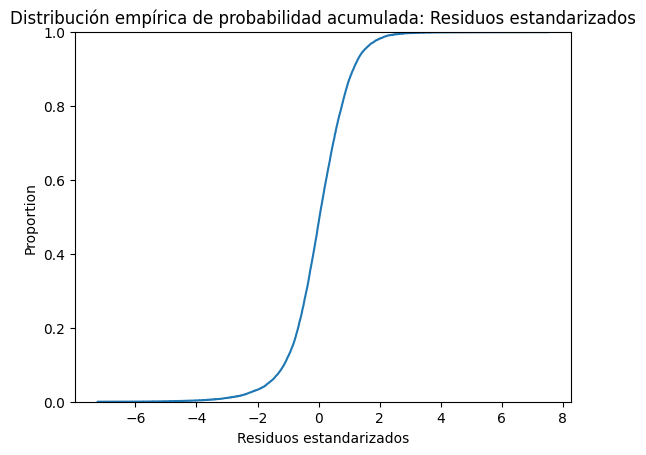

In [ ]:
chart=sns.ecdfplot(x=STDRESL3)
chart.set_title('Distribución empírica de probabilidad acumulada: Residuos estandarizados')
chart.set_xlabel('Residuos estandarizados')

In [ ]:
estadistico,p_value=stats.shapiro(STDRESL3)
print(f"Estadístico: {estadistico}, p_value: {p_value}")

Estadístico: 0.9643182754516602, p_value: 0.0


In [ ]:
kstest(STDRESL3,stats.norm.cdf)

KstestResult(statistic=0.05204650679607403, pvalue=1.694354478073496e-47, statistic_location=-0.6502358585391687, statistic_sign=-1)

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
modelRandomForest = RandomForestRegressor(n_estimators = 500, random_state = 0)
modelRandomForest.fit(X_train[sig_colums], y_train)
predRF = modelRandomForest.predict(X_test[sig_colums])
df_Temp = pd.DataFrame({'MAE':[mean_absolute_error(y_test,predRF)],
                               'RMSE':[np.sqrt(mean_squared_error(y_test,predRF))],
                               'r2.score':[r2_score(y_test,predRF)]}, index=['Random Forest'])
df_Performance = df_Performance.append(df_Temp)
df_Performance

MAE       RMSE  r2.score
Linear Regression    12.466012  17.014884  0.647474
Linear Regression 2  12.306573  16.608157  0.666930
Linear Regression 3  12.311236  16.605940  0.667019
Random Forest        11.415434  15.653026  0.704138

In [ ]:
X_trainn4=sm.add_constant(X_train[sig_colums],prepend=True)
mRF=sm.OLS(endog=y_train.values.reshape(-1,1),exog=X_trainn3,)
mRF=mRF.fit()
print(mRF.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     1099.
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        16:18:41   Log-Likelihood:                -84988.
No. Observations:               19988   AIC:                         1.700e+05
Df Residuals:                   19953   BIC:                         1.703e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    191

In [ ]:
y_t4=y_train.values.flatten()
prediccion4_train=mRF.predict(exog=X_trainn4)
residuosl4_train=prediccion4_train-y_t4

In [ ]:
S4=pstdev(residuosl4_train)

In [ ]:
STDRESL4=residuosl4_train/S4

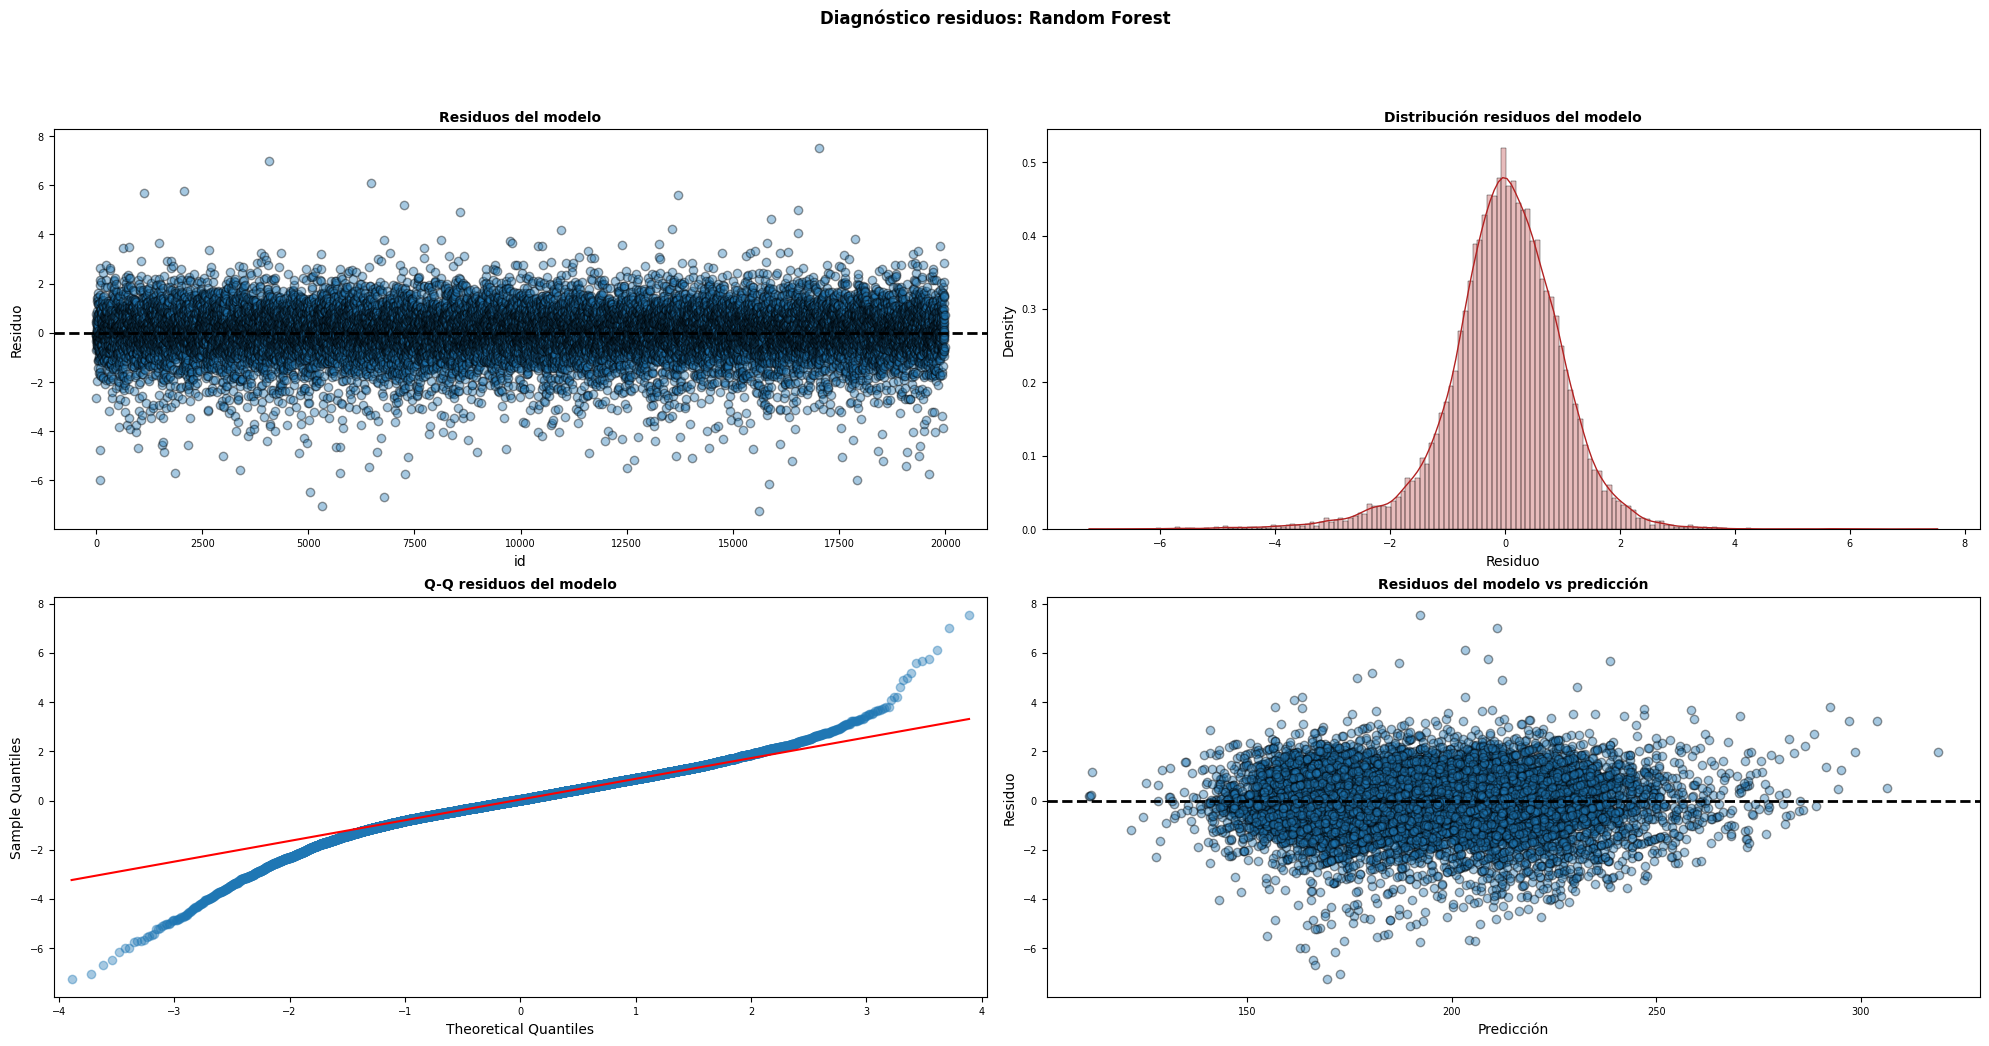

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

axes[0, 0].scatter(list(range(len(y_t4))), STDRESL4,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 0].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('id')
axes[0, 0].set_ylabel('Residuo')
axes[0, 0].tick_params(labelsize = 7)

sns.histplot(
    data    = STDRESL4,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[0, 1]
)
axes[0, 1].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[0, 1].set_xlabel("Residuo")
axes[0, 1].tick_params(labelsize = 7)

sm.qqplot(
    STDRESL4,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 0], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 0].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 0].tick_params(labelsize = 7)

axes[1, 1].scatter(prediccion4_train, STDRESL4,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[1, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1, 1].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[1, 1].set_xlabel('Predicción')
axes[1, 1].set_ylabel('Residuo')
axes[1, 1].tick_params(labelsize = 7)
# Se eliminan los axes vacíos
fig.delaxes(axes[2,0])
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos: Random Forest', fontsize = 12, fontweight = "bold");

Text(0.5, 0, 'Residuos estandarizados')

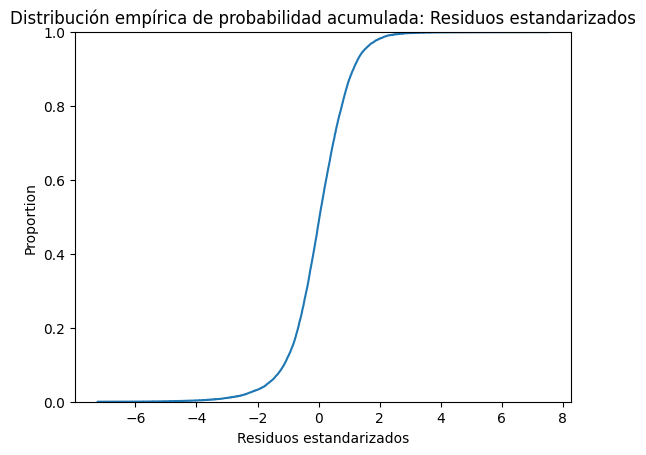

In [ ]:
chart=sns.ecdfplot(x=STDRESL4)
chart.set_title('Distribución empírica de probabilidad acumulada: Residuos estandarizados')
chart.set_xlabel('Residuos estandarizados')

In [ ]:
estadistico,p_value=stats.shapiro(STDRESL4)
print(f"Estadístico: {estadistico}, p_value: {p_value}")

Estadístico: 0.9643182754516602, p_value: 0.0


In [ ]:
kstest(STDRESL4,stats.norm.cdf)

KstestResult(statistic=0.05204650679607403, pvalue=1.694354478073496e-47, statistic_location=-0.6502358585391687, statistic_sign=-1)

## Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df3, # predictors y target
    df3['Category'],  
    test_size=0.3)

print(X_train.shape)
print(X_test.shape)

(28555, 110)
(12238, 110)


In [ ]:
X_train.head()

id  log_price  Category property_type        room_type  TV  \
21545    644872   5.010635         2     Apartment     Private room   1   
4685    9328077   5.164786         2     Apartment  Entire home/apt   1   
10485  11940785   3.610918         1    Guesthouse      Shared room   0   
3125    6689195   4.330733         1     Apartment  Entire home/apt   1   
30452  17832970   4.094345         1     Apartment     Private room   1   

       Cable TV  Wireless Internet  Air conditioning  Kitchen  ...  \
21545         0                  1                 1        1  ...   
4685          0                  1                 0        1  ...   
10485         0                  1                 1        1  ...   
3125          0                  1                 1        1  ...   
30452         0                  1                 1        1  ...   

       instant_bookable   latitude   longitude  neighbourhood  \
21545                 1  40.589277  -73.795313  The Rockaways   
4685                  0  40.725580  -73.985412   East Village   
10485                 1  40.795116  -73.948876    East Harlem   
3125                  0  34.193201 -118.324876        Burbank   
30452                 0  40.812493  -73.943136         Harlem   

       number_of_reviews  review_scores_rating  zipcode  bedrooms  beds  month  
21545                  2                 100.0  11692.0       1.0   1.0   10.0  
4685                   9                  95.0  10009.0       1.0   2.0    3.0  
10485                 31                  86.0  10029.0       1.0   1.0   10.0  
3125                   1                   NaN  91504.0       2.0   2.0    5.0  
30452                  9                 100.0  10027.0       1.0   1.0    7.0  

[5 rows x 110 columns]

In [ ]:
X_train['property_type']=X_train['property_type'].map(property_map)
X_test['property_type']=X_test['property_type'].map(property_map)
X_train['neighbourhood']=X_train['neighbourhood'].map(neig_map)
X_test['neighbourhood']=X_test['neighbourhood'].map(neig_map)
X_train['city']=X_train['city'].map(city_map)
X_test['city']=X_test['city'].map(city_map)
##X_train['Category']=X_train['Category'].map(category_map)
##X_test['Category']=X_test['Category'].map(category_map)
X_train['bed_type']=X_train['bed_type'].map(bed_map)
X_test['bed_type']=X_test['bed_type'].map(bed_map)
X_train['cancellation_policy']=X_train['cancellation_policy'].map(cancellation_map)
X_test['cancellation_policy']=X_test['cancellation_policy'].map(cancellation_map)
X_train['room_type']=X_train['room_type'].map(room_map)
X_test['room_type']=X_test['room_type'].map(room_map)

In [ ]:
X_test['Category'].unique()

array([3, 2, 1])

In [ ]:
X_test.shape

(12238, 110)

In [ ]:
y_test.head()

29458    3
35823    2
40154    2
5711     2
19403    3
Name: Category, dtype: int64

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns )
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns )

In [ ]:
X_test.shape

(12238, 110)

In [ ]:
X_train.head()

id  log_price  Category  property_type  room_type        TV  \
0 -1.745104   0.319728  0.296731      -0.237568  -1.036346  0.647211   
1 -0.318962   0.535144  0.296731      -0.237568   0.876697  0.647211   
2  0.110153  -1.636291 -0.906841      -1.180091  -2.123019 -1.545091   
3 -0.752376  -0.630393 -0.906841      -0.237568   0.876697  0.647211   
4  1.077894  -0.960732 -0.906841      -0.237568  -1.036346  0.647211   

   Cable TV  Wireless Internet  Air conditioning   Kitchen  ...  \
0 -0.693369           0.199501          0.580491  0.309895  ...   
1 -0.693369           0.199501         -1.722680  0.309895  ...   
2 -0.693369           0.199501          0.580491  0.309895  ...   
3 -0.693369           0.199501          0.580491  0.309895  ...   
4 -0.693369           0.199501          0.580491  0.309895  ...   

   instant_bookable  latitude  longitude  neighbourhood  number_of_reviews  \
0          1.666019  0.697933   0.861587      -0.516709          -0.499826   
1         -0.600233  0.742041   0.852842       0.720387          -0.317527   
2          1.666019  0.764542   0.854523      -0.575036           0.255411   
3         -0.600233 -1.371823  -1.186813      -0.687306          -0.525868   
4         -0.600233  0.770166   0.854787      -0.448833          -0.317527   

   review_scores_rating   zipcode  bedrooms      beds     month  
0              0.763499 -0.862496 -0.308777 -0.565734  1.044199  
1              0.113802 -0.905930 -0.308777  0.230007 -1.033651  
2             -1.055652 -0.905413 -0.308777 -0.565734  1.044199  
3                   NaN  1.197217  0.869054  0.230007 -0.439979  
4              0.763499 -0.905465 -0.308777 -0.565734  0.153692  

[5 rows x 110 columns]

In [ ]:
df3.shape

(40793, 110)

In [ ]:
imputer = KNNImputer(n_neighbors=16)
imputer.fit(X_train)

X_train = pd.DataFrame(imputer.transform(X_train), columns = df3.columns )
X_test = pd.DataFrame(imputer.transform(X_test), columns = df3.columns )

In [ ]:
X_train.drop(['id', 'log_price'], axis=1, inplace=True)
X_test.drop(['id', 'log_price'], axis=1, inplace=True)
X_train.drop(['Category'],axis=1,inplace=True)
X_test.drop(['Category'],axis=1,inplace=True)
X_train.head(2)

property_type  room_type        TV  Cable TV  Wireless Internet  \
0      -0.237568  -1.036346  0.647211 -0.693369           0.199501   
1      -0.237568   0.876697  0.647211 -0.693369           0.199501   

   Air conditioning   Kitchen  Free parking on premises  Pets allowed  \
0          0.580491  0.309895                 -0.687673     -0.395179   
1         -1.722680  0.309895                 -0.687673     -0.395179   

   Breakfast  ...  instant_bookable  latitude  longitude  neighbourhood  \
0  -0.354069  ...          1.666019  0.697933   0.861587      -0.516709   
1  -0.354069  ...         -0.600233  0.742041   0.852842       0.720387   

   number_of_reviews  review_scores_rating   zipcode  bedrooms      beds  \
0          -0.499826              0.763499 -0.862496 -0.308777 -0.565734   
1          -0.317527              0.113802 -0.905930 -0.308777  0.230007   

      month  
0  1.044199  
1 -1.033651  

[2 rows x 107 columns]

In [ ]:
X_train.head()

property_type  room_type        TV  Cable TV  Wireless Internet  \
0      -0.237568  -1.036346  0.647211 -0.693369           0.199501   
1      -0.237568   0.876697  0.647211 -0.693369           0.199501   
2      -1.180091  -2.123019 -1.545091 -0.693369           0.199501   
3      -0.237568   0.876697  0.647211 -0.693369           0.199501   
4      -0.237568  -1.036346  0.647211 -0.693369           0.199501   

   Air conditioning   Kitchen  Free parking on premises  Pets allowed  \
0          0.580491  0.309895                 -0.687673     -0.395179   
1         -1.722680  0.309895                 -0.687673     -0.395179   
2          0.580491  0.309895                 -0.687673     -0.395179   
3          0.580491  0.309895                 -0.687673     -0.395179   
4          0.580491  0.309895                 -0.687673     -0.395179   

   Breakfast  ...  instant_bookable  latitude  longitude  neighbourhood  \
0  -0.354069  ...          1.666019  0.697933   0.861587      -0.516709   
1  -0.354069  ...         -0.600233  0.742041   0.852842       0.720387   
2  -0.354069  ...          1.666019  0.764542   0.854523      -0.575036   
3  -0.354069  ...         -0.600233 -1.371823  -1.186813      -0.687306   
4  -0.354069  ...         -0.600233  0.770166   0.854787      -0.448833   

   number_of_reviews  review_scores_rating   zipcode  bedrooms      beds  \
0          -0.499826              0.763499 -0.862496 -0.308777 -0.565734   
1          -0.317527              0.113802 -0.905930 -0.308777  0.230007   
2           0.255411             -1.055652 -0.905413 -0.308777 -0.565734   
3          -0.525868              0.146287  1.197217  0.869054  0.230007   
4          -0.317527              0.763499 -0.905465 -0.308777 -0.565734   

      month  
0  1.044199  
1 -1.033651  
2  1.044199  
3 -0.439979  
4  0.153692  

[5 rows x 107 columns]

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()
model.fit(X_train[sig_colums],y_train)
predictions=model.predict(X_test[sig_colums])
df_Temp = pd.DataFrame({'MAE':[mean_absolute_error(y_test,predictions)],
                               'RMSE':[np.sqrt(mean_squared_error(y_test,predictions))],
                               'r2.score':[r2_score(y_test,predictions)]}, index=['Logistic Regression'])
df_Performance = df_Performance.append(df_Temp)
df_Performance

MAE       RMSE  r2.score
Linear Regression    12.466012  17.014884  0.647474
Linear Regression 2  12.306573  16.608157  0.666930
Linear Regression 3  12.311236  16.605940  0.667019
Random Forest        11.415434  15.653026  0.704138
Logistic Regression   0.293839   0.601382  0.480769

In [ ]:
X_trainn5=sm.add_constant(X_train[sig_colums],prepend=True)
mLR=sm.OLS(endog=y_train.values.reshape(-1,1),exog=X_trainn5,)
mLR=mLR.fit()
print(mLR.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     1052.
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        16:44:15   Log-Likelihood:                -23624.
No. Observations:               28555   AIC:                         4.732e+04
Df Residuals:                   28520   BIC:                         4.761e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [ ]:
y_t5=y_train.values.flatten()
prediccion5_train=mLR.predict(exog=X_trainn5)
residuosl5_train=prediccion5_train-y_t5

In [ ]:
S5=pstdev(residuosl5_train)

In [ ]:
STDRESL5=residuosl5_train/S5

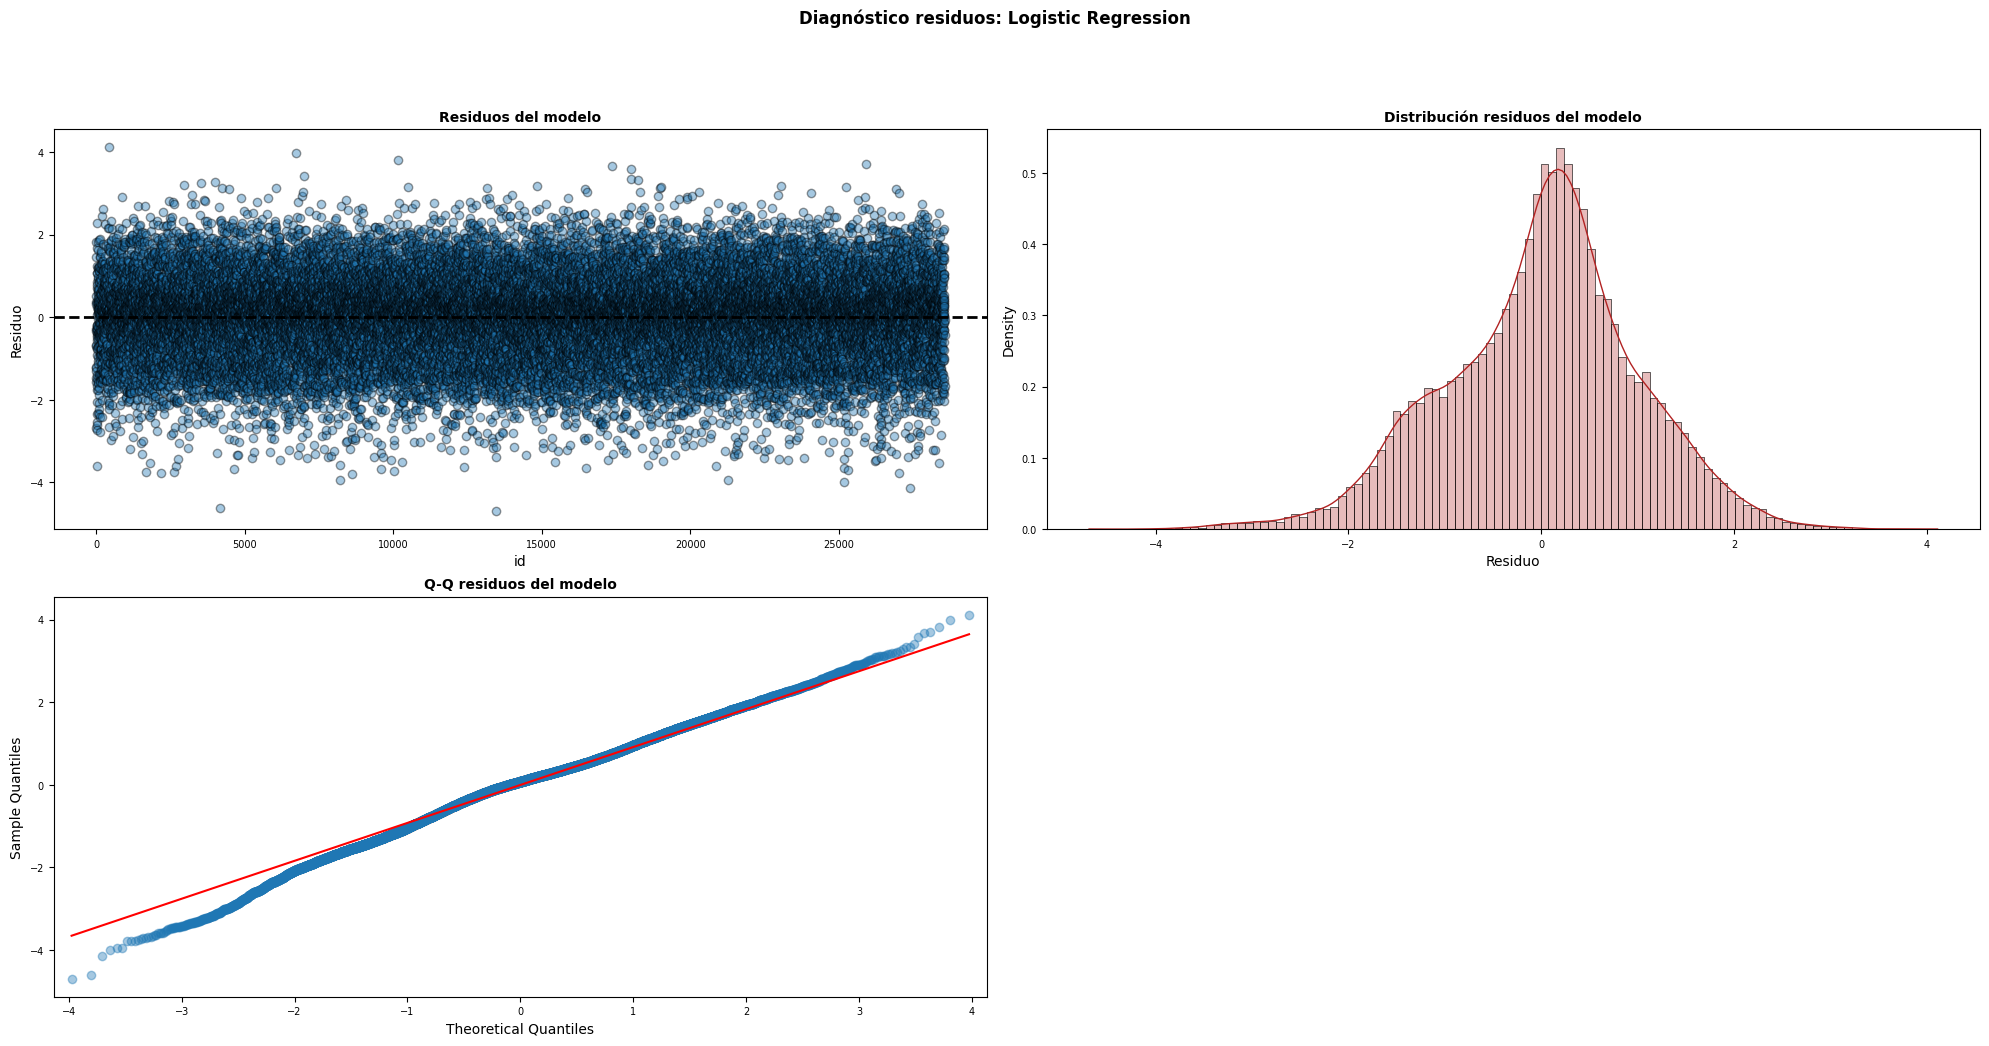

In [183]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

axes[0, 0].scatter(list(range(len(y_t5))), STDRESL5,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 0].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('id')
axes[0, 0].set_ylabel('Residuo')
axes[0, 0].tick_params(labelsize = 7)

sns.histplot(
    data    = STDRESL5,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[0, 1]
)
axes[0, 1].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[0, 1].set_xlabel("Residuo")
axes[0, 1].tick_params(labelsize = 7)

sm.qqplot(
    STDRESL5,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 0], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 0].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,0])
fig.delaxes(axes[2,1])
fig.delaxes(axes[1,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos: Logistic Regression', fontsize = 12, fontweight = "bold");